# Análisis de datos COVID.
Este notebook tiene como proposito preparar los datos para, en una primer fase, crear un mapa interactivo de los casos de personas infectadas por COVID.  
A continuación se enlistan las fuentes de datos:


* [Datos Abiertos - Dirección General de Epidemiología](https://www.gob.mx/salud/documentos/datos-abiertos-152127?idiom=es)

In [3]:
library(plotly)
library(dplyr)

Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
load("../Datos_covid.RData")

In [5]:
unique(datos_actuales$FECHA_DEF)

[1] 9999-99-99 2020-05-02 2020-04-23 2020-05-08 2020-04-01 2020-04-21
 [7] 2020-04-25 2020-04-19 2020-05-11 2020-05-07 2020-05-06 2020-04-20
[13] 2020-05-04 2020-04-24 2020-04-29 2020-04-07 2020-05-05 2020-03-30
[19] 2020-05-09 2020-03-31 2020-04-05 2020-04-09 2020-04-18 2020-05-12
[25] 2020-04-06 2020-04-22 2020-04-04 2020-03-18 2020-05-10 2020-04-28
[31] 2020-04-26 2020-05-03 2020-04-12 2020-04-08 2020-03-26 2020-04-13
[37] 2020-04-27 2020-04-10 2020-04-11 2020-04-03 2020-04-14 2020-04-16
[43] 2020-04-30 2020-04-02 2020-03-29 2020-04-15 2020-05-13 2020-04-17
[49] 2020-05-01 2020-03-28 2020-05-14 2020-03-27 2020-03-23 2020-03-19
[55] 2020-03-09 2020-02-10 2020-02-23 2020-02-25 2020-02-21 2020-03-11
[61] 2020-03-16 2020-03-22 2020-03-25 2020-03-04 2020-03-24 2020-03-12
[67] 2020-01-14 2020-01-29 2020-02-26 2020-03-20 2020-01-15 2020-03-17
72 Levels: 2020-01-14 2020-01-15 2020-01-29 2020-02-10 ... 9999-99-99

"9999-99-99" es para 

In [6]:
unique(datos_actuales$ENTIDAD_NAC_merge)

[1] "YUCATÁN"                         "MÉXICO"                         
 [3] "AGUASCALIENTES"                  "ZACATECAS"                      
 [5] "NUEVO LEÓN"                      "TABASCO"                        
 [7] "CIUDAD DE MÉXICO"                "MICHOACÁN DE OCAMPO"            
 [9] "GUANAJUATO"                      "TAMAULIPAS"                     
[11] "SAN LUIS POTOSÍ"                 "SINALOA"                        
[13] "COAHUILA DE ZARAGOZA"            "VERACRUZ DE IGNACIO DE LA LLAVE"
[15] "PUEBLA"                          "OAXACA"                         
[17] "SONORA"                          "JALISCO"                        
[19] "DURANGO"                         "TLAXCALA"                       
[21] "GUERRERO"                        "QUINTANA ROO"                   
[23] "CHIHUAHUA"                       "CHIAPAS"                        
[25] "BAJA CALIFORNIA SUR"             "BAJA CALIFORNIA"                
[27] "QUERÉTARO"                       "CAMPECHE"                       
[29] "HIDALGO"                         "NO ESPECIFICADO"                
[31] "NAYARIT"                         "MORELOS"                        
[33] "COLIMA"

In [7]:
unique(datos_actuales$EDAD)

[1]  55  33  20  26  54  63  35  25  56  45   2  53  68  18  41   9  39  50
 [19]  57  38  34  40  58  42  44  21  37  46  36  12  11  29  47  24  27  22
 [37]  30  28  32   7  72  70  10  52  59  31  66  60  49  65   1  43  16  23
 [55]  48   8  61  19  76  78  51  62  64  15   6   4  71  86  93  84   3  77
 [73]  13  74  17  67   0  14  75  73  79 100   5  82  83  80  95  87  81  69
 [91]  89  91  85  88  92  96  90 101  98  99  94 108  97 102 103 114 104 113
[109] 120 106

In [8]:
?ifelse


In [9]:
datos_actuales$n = 1
datos_actuales$n_def = ifelse(datos_actuales$FECHA_DEF != "9999-99-99", 1, 0)


In [10]:
Letalidad_nacional_edad = datos_actuales %>% group_by(EDAD) %>% summarise(n = sum(n), n_defunciones = sum(n_def), Letalidad = sum(n_def) / sum(n))
Letalidad_nacional_edad

EDAD n    n_defunciones Letalidad  
1    0    607 23            0.037891269
2    1    993 33            0.033232628
3    2    575 12            0.020869565
4    3    454  4            0.008810573
5    4    399  2            0.005012531
6    5    395  2            0.005063291
7    6    321  3            0.009345794
8    7    339  3            0.008849558
9    8    334  3            0.008982036
10   9    339  4            0.011799410
11  10    342  6            0.017543860
12  11    349  0            0.000000000
13  12    313  6            0.019169329
14  13    377  3            0.007957560
15  14    408  3            0.007352941
16  15    378  7            0.018518519
17  16    441  3            0.006802721
18  17    518  1            0.001930502
19  18    670 10            0.014925373
20  19    926 10            0.010799136
21  20   1105  7            0.006334842
22  21   1276  8            0.006269592
23  22   1495 14            0.009364548
24  23   1904 11            0.005777311
25  24   2288  9            0.003933566
26  25   2699 17            0.006298629
27  26   3123 21            0.006724304
28  27   3483 15            0.004306632
29  28   3538 18            0.005087620
30  29   3693 25            0.006769564
⋮   ⋮    ⋮    ⋮             ⋮          
81   80  466  80            0.17167382 
82   81  405  68            0.16790123 
83   82  413  62            0.15012107 
84   83  351  59            0.16809117 
85   84  342  75            0.21929825 
86   85  296  40            0.13513514 
87   86  217  51            0.23502304 
88   87  246  54            0.21951220 
89   88  208  33            0.15865385 
90   89  160  21            0.13125000 
91   90  153  32            0.20915033 
92   91  109  25            0.22935780 
93   92   91  16            0.17582418 
94   93   85  15            0.17647059 
95   94   48   3            0.06250000 
96   95   60   7            0.11666667 
97   96   36   3            0.08333333 
98   97   27   2            0.07407407 
99   98   19   1            0.05263158 
100  99   16   3            0.18750000 
101 100   14   2            0.14285714 
102 101    7   0            0.00000000 
103 102    6   0            0.00000000 
104 103    6   0            0.00000000 
105 104    1   0            0.00000000 
106 106    1   0            0.00000000 
107 108    1   0            0.00000000 
108 113    1   0            0.00000000 
109 114    2   0            0.00000000 
110 120    1   0            0.00000000

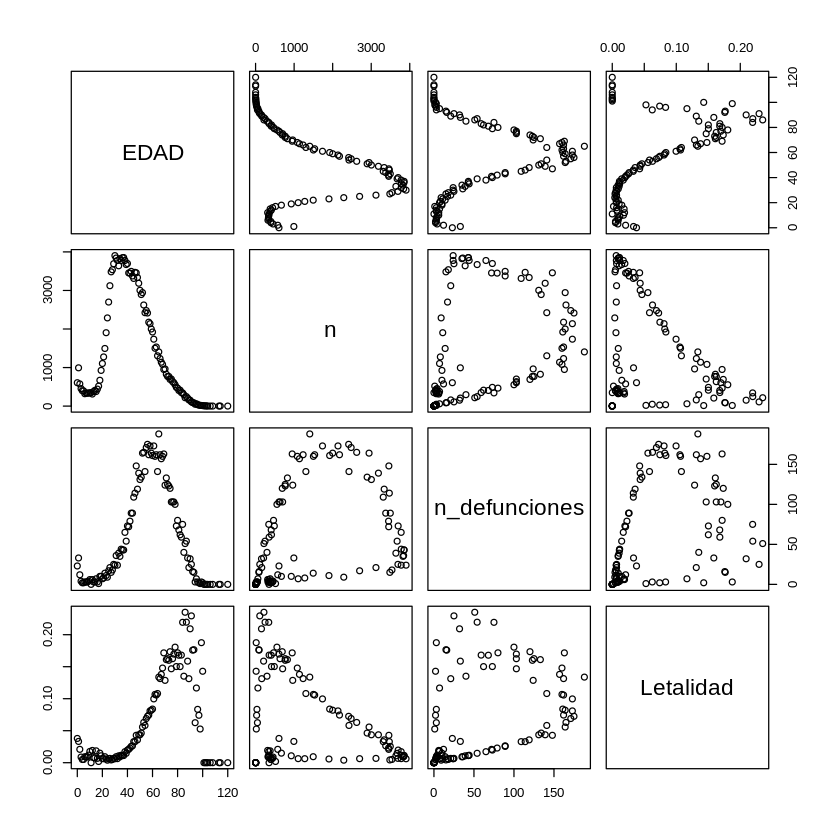

In [11]:
plot(Letalidad_nacional_edad)

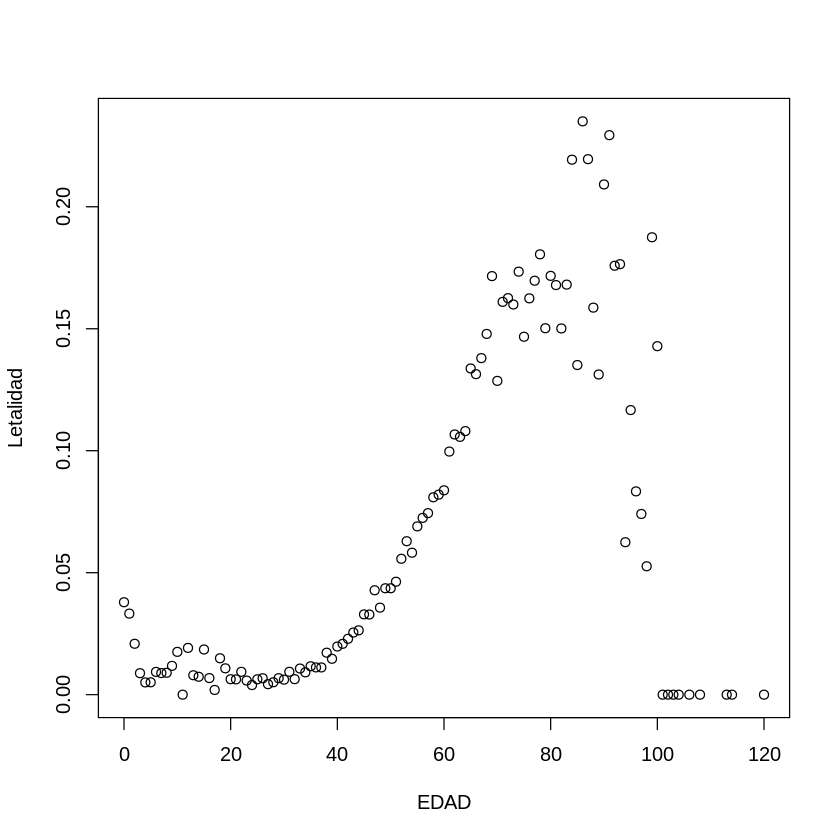

In [61]:
plot(Letalidad_nacional_edad[,c("EDAD", "Letalidad")])

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”

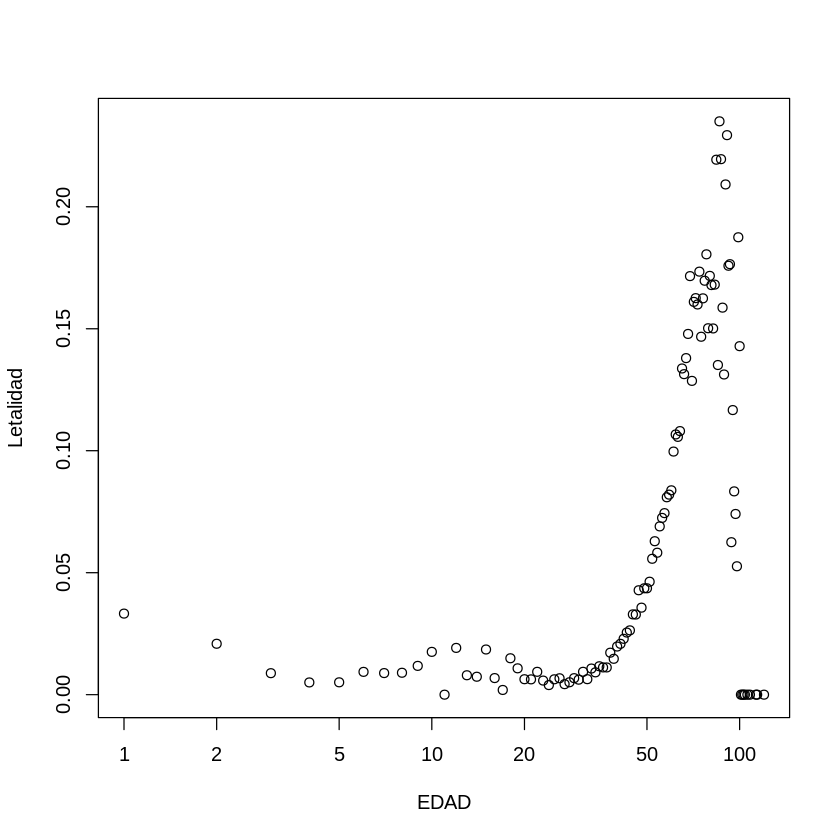

In [65]:
plot(Letalidad_nacional_edad[,c("EDAD", "Letalidad")], log = 'x')

### Modelos lineal

In [97]:
modelo = lm(data = Letalidad_nacional_edad, Letalidad~EDAD)

In [98]:
round(confint(modelo), 3)

2.5 %  97.5 %
(Intercept) -0.020 0.023 
EDAD         0.001 0.002

In [99]:
alfa = modelo$coefficients[1]
beta = modelo$coefficients[2]

In [100]:
Letalidad_nacional_edad$Estimada_media <- alfa + beta * Letalidad_nacional_edad$EDAD

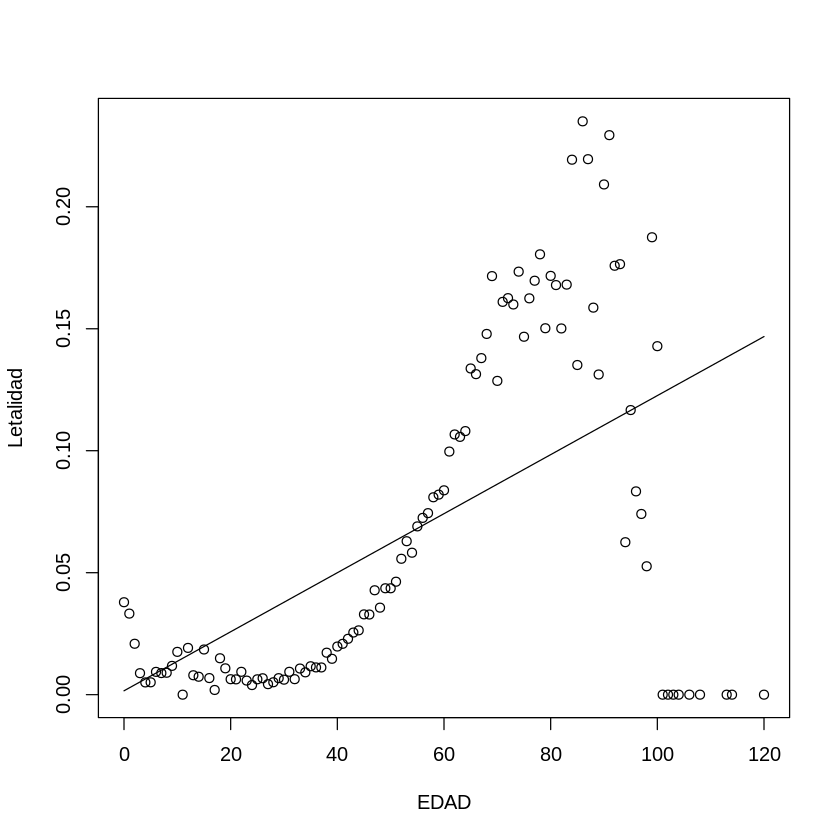

In [101]:
plot(Letalidad_nacional_edad[,c("EDAD", "Letalidad")])
lines(Letalidad_nacional_edad[,c("EDAD", "Estimada_media")])

### Transformación de datos

In [102]:
Letalidad_nacional_edad$logit_Letalidad = log(Letalidad_nacional_edad$Letalidad / (1 - Letalidad_nacional_edad$Letalidad))

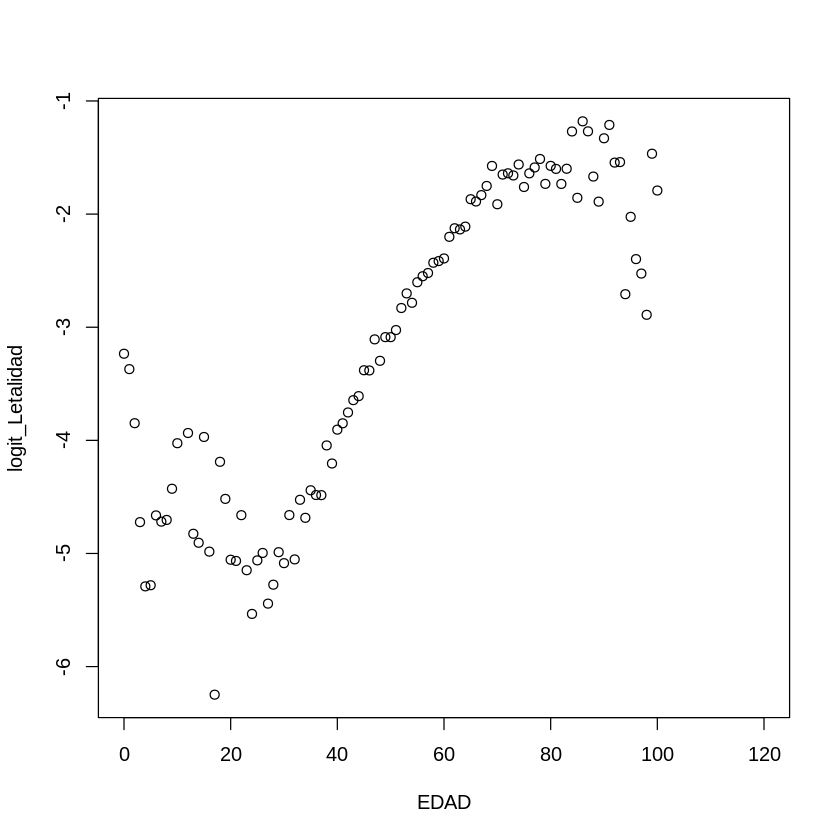

In [103]:
plot(Letalidad_nacional_edad[,c("EDAD", "logit_Letalidad")])

In [104]:
summary(Letalidad_nacional_edad$logit_Letalidad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -Inf  -4.722  -3.334    -Inf  -1.874  -1.180 

In [28]:
tasas_originales = function(x, a, b){
    return( 1/(1+exp(-(a + b * x))))
}

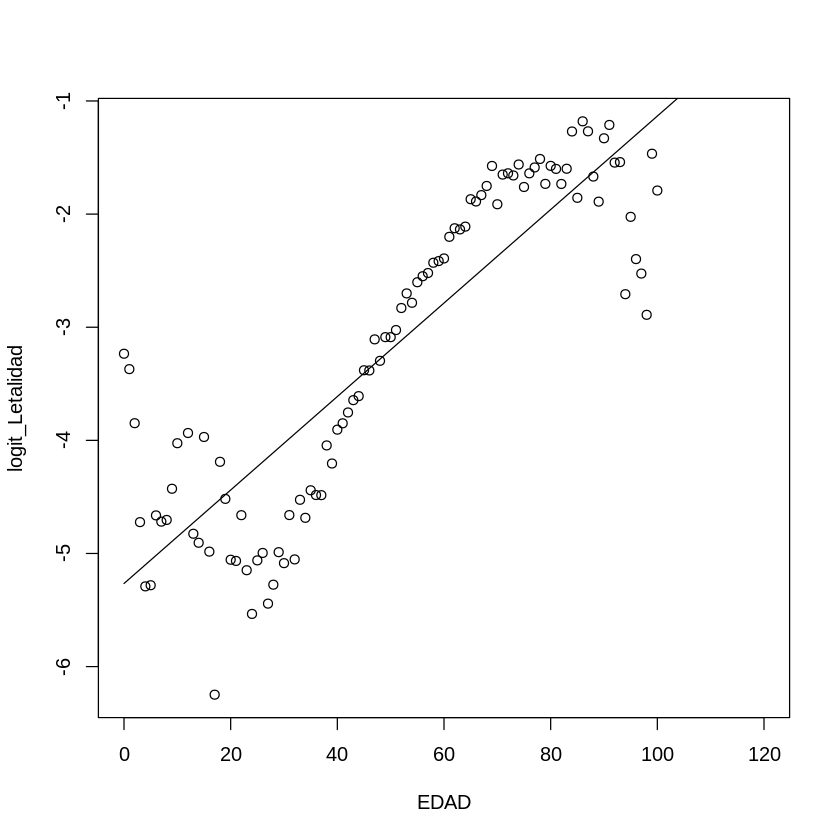

In [128]:
modelo = lm(data = Letalidad_nacional_edad[!is.infinite(Letalidad_nacional_edad$logit_Letalidad),], logit_Letalidad~EDAD)
alfa = modelo$coefficients[1]
beta = modelo$coefficients[2]

Letalidad_nacional_edad$Estimada_media_logit <- alfa + beta * Letalidad_nacional_edad$EDAD

plot(Letalidad_nacional_edad[,c("EDAD", "logit_Letalidad")])
lines(Letalidad_nacional_edad[,c("EDAD", "Estimada_media_logit")])

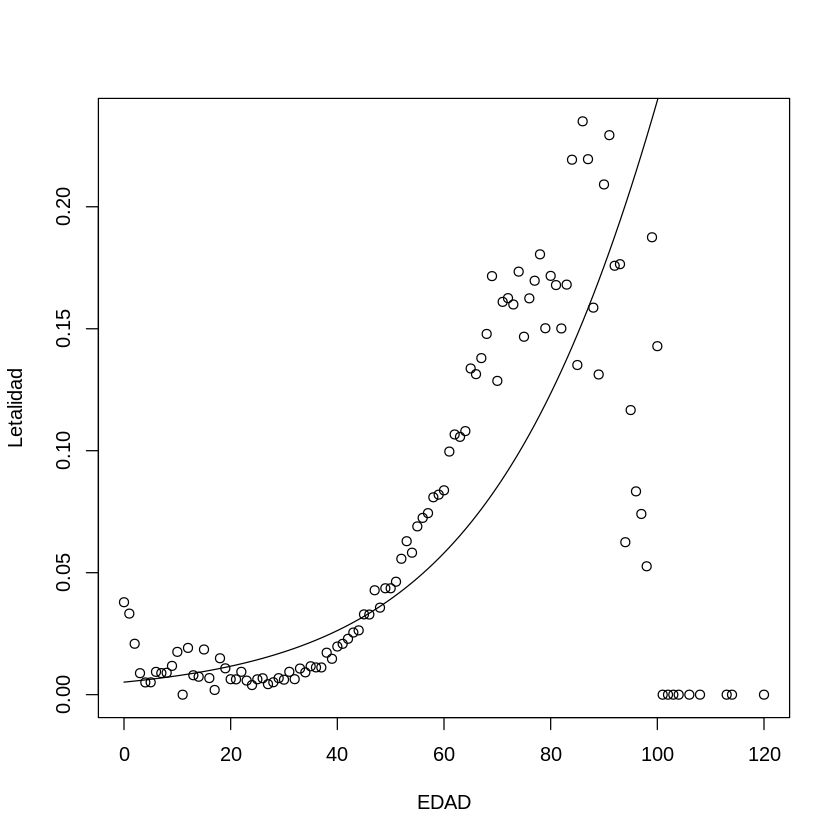

In [129]:
Letalidad_nacional_edad$Estimada_media_logit_tasas <- tasas_originales(Letalidad_nacional_edad$EDAD, alfa, beta)
plot(Letalidad_nacional_edad[,c("EDAD", "Letalidad")])
lines(Letalidad_nacional_edad[,c("EDAD", "Estimada_media_logit_tasas")])

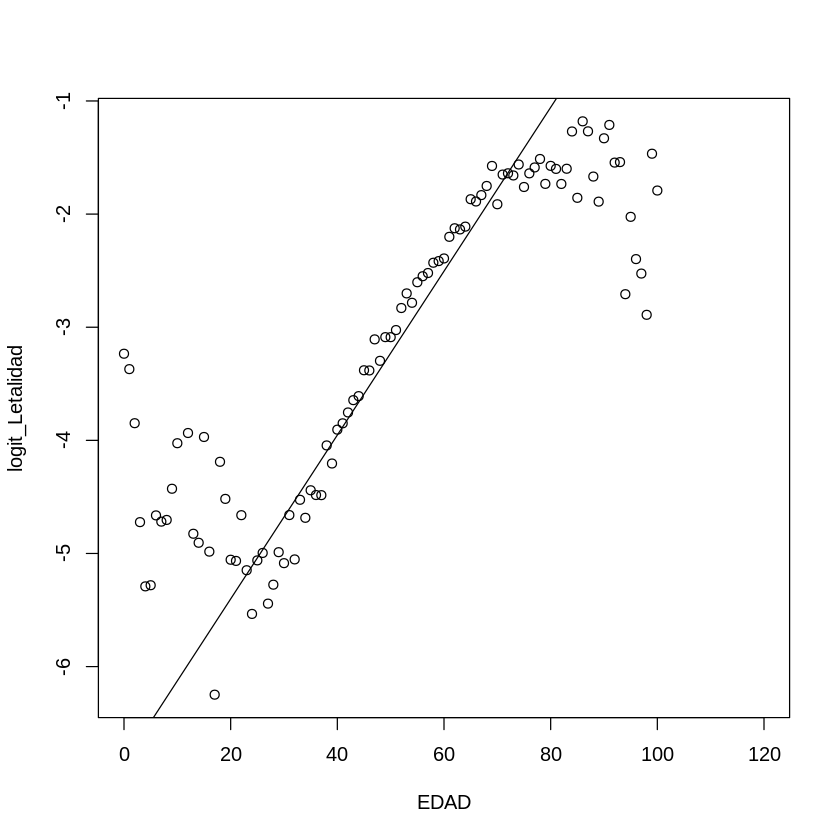

In [130]:
modelo = lm(data = Letalidad_nacional_edad[
    !is.infinite(Letalidad_nacional_edad$logit_Letalidad) & 
    Letalidad_nacional_edad$EDAD >= 20 &
    Letalidad_nacional_edad$EDAD <= 80,
], logit_Letalidad~EDAD)
alfa = modelo$coefficients[1]
beta = modelo$coefficients[2]

Letalidad_nacional_edad$Estimada_media_logit_20_80 <- alfa + beta * Letalidad_nacional_edad$EDAD

plot(Letalidad_nacional_edad[,c("EDAD", "logit_Letalidad")])
lines(Letalidad_nacional_edad[,c("EDAD", "Estimada_media_logit_20_80")])

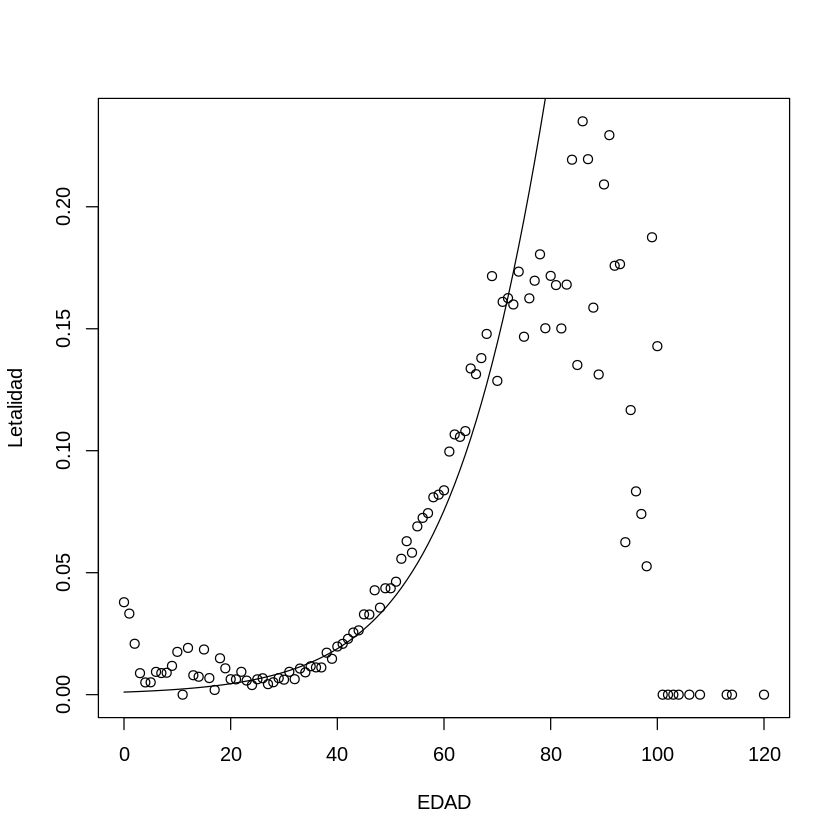

In [133]:
Letalidad_nacional_edad$Estimada_media_logit_tasas_20_80 <- tasas_originales(Letalidad_nacional_edad$EDAD, alfa, beta)


plot(Letalidad_nacional_edad[,c("EDAD", "Letalidad")])
lines(Letalidad_nacional_edad[,c("EDAD", "Estimada_media_logit_tasas_20_80")])

In [52]:
estimar_tasas <- function(df, edad_min = 20, edad_max = 80){
    Letalidad = df %>% group_by(EDAD) %>% summarise(n = sum(n), n_defunciones = sum(n_def), Letalidad = sum(n_def) / sum(n))
    Letalidad$logit_Letalidad = log(Letalidad$Letalidad / (1 - Letalidad$Letalidad))    
    modelo = lm(data = Letalidad[
    !is.infinite(Letalidad$logit_Letalidad) & 
    Letalidad$EDAD >= edad_min &
    Letalidad$EDAD <= edad_max,
    ], logit_Letalidad~EDAD)
    alfa = modelo$coefficients[1]
    beta = modelo$coefficients[2]

    Letalidad$Estimada_media_logit <- alfa + beta * Letalidad$EDAD

    plot(Letalidad[,c("EDAD", "logit_Letalidad")])
    lines(Letalidad[,c("EDAD", "Estimada_media_logit")], col = "red")
    
    Letalidad$Estimada_media_logit_tasas <- tasas_originales(Letalidad$EDAD, alfa, beta)


    plot(Letalidad[,c("EDAD", "Letalidad")])
    lines(Letalidad[,c("EDAD", "Estimada_media_logit_tasas")], col = "red")
    return(Letalidad[, c("EDAD", "Letalidad", "Estimada_media_logit_tasas")])
    
}

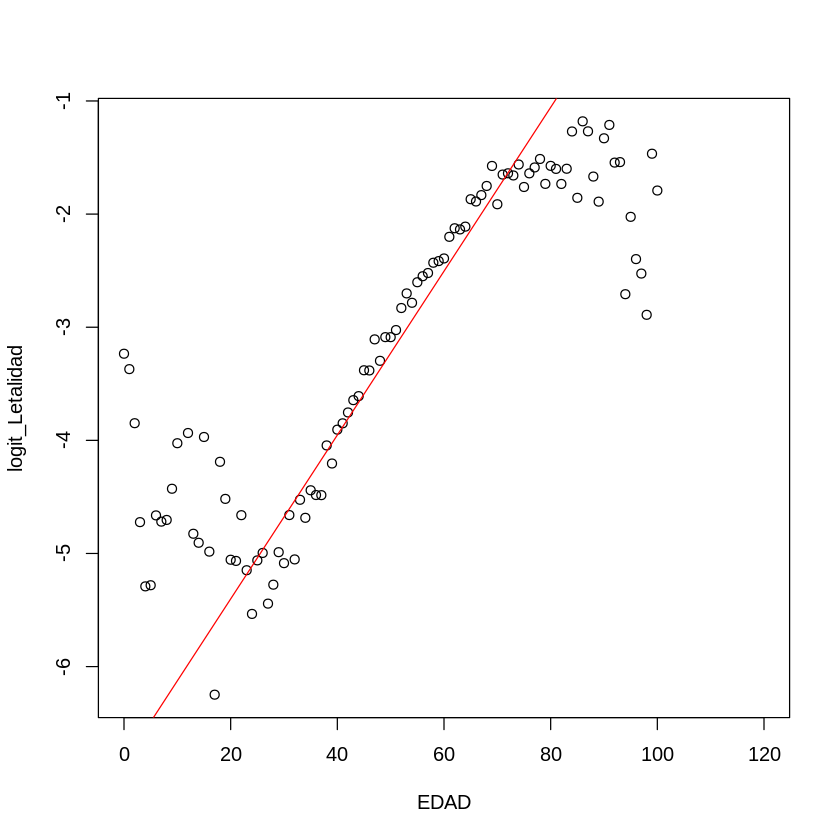

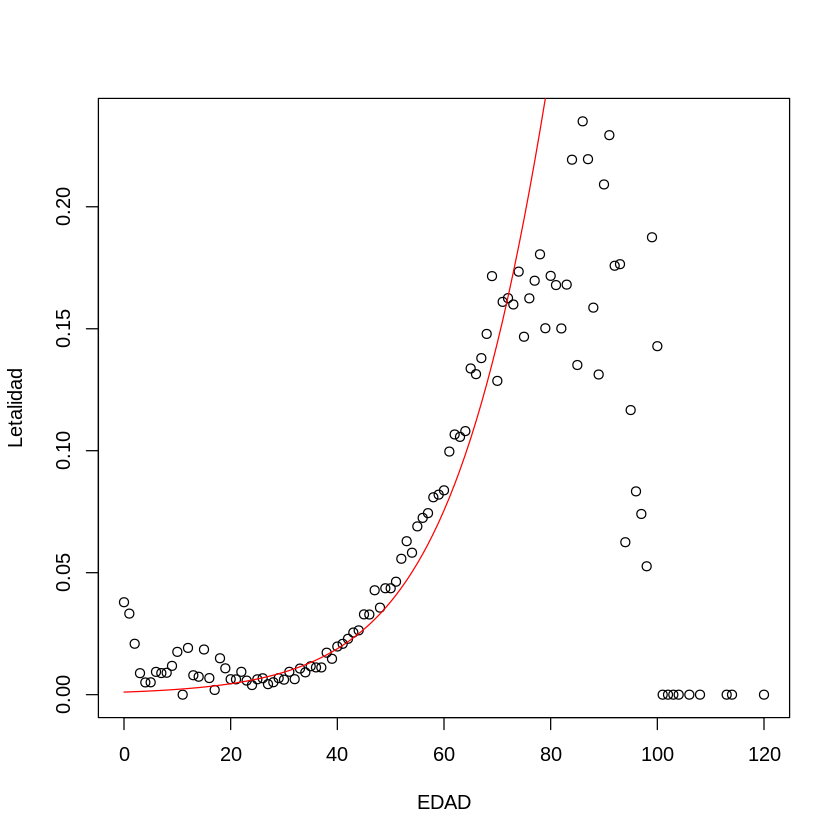

In [172]:
estimar_tasas(datos_actuales)

In [173]:
Letalidad_estados <- datos_actuales %>% 
group_by(ENTIDAD_NAC_merge) %>% 
summarise(n = sum(n), n_defunciones = sum(n_def), Letalidad = sum(n_def) / sum(n)) %>%
arrange(-n_defunciones)
Letalidad_estados

ENTIDAD_NAC_merge               n     n_defunciones Letalidad  
1  CIUDAD DE MÉXICO                37889 1251          0.033017498
2  MÉXICO                          20388  734          0.036001570
3  VERACRUZ DE IGNACIO DE LA LLAVE  6371  446          0.070004709
4  SINALOA                          5191  380          0.073203622
5  TABASCO                          4466  339          0.075906852
6  PUEBLA                           4802  321          0.066847147
7  BAJA CALIFORNIA                  3189  277          0.086861085
8  OAXACA                           2815  241          0.085612789
9  GUERRERO                         3416  231          0.067622951
10 JALISCO                          7902  229          0.028980005
11 YUCATÁN                          3048  208          0.068241470
12 MICHOACÁN DE OCAMPO              4258  201          0.047205261
13 GUANAJUATO                       7287  175          0.024015370
14 CHIHUAHUA                        2205  163          0.073922902
15 HIDALGO                          2146  158          0.073625349
16 COAHUILA DE ZARAGOZA             5220  155          0.029693487
17 MORELOS                          1990  142          0.071356784
18 CHIAPAS                          2107  112          0.053156146
19 SONORA                           2579  110          0.042652191
20 TLAXCALA                         1713  101          0.058960887
21 TAMAULIPAS                       4303   94          0.021845224
22 SAN LUIS POTOSÍ                  3028   86          0.028401585
23 ZACATECAS                        1488   83          0.055779570
24 DURANGO                          1762   79          0.044835414
25 NAYARIT                          1214   64          0.052718287
26 QUINTANA ROO                      807   62          0.076827757
27 NUEVO LEÓN                       7173   53          0.007388819
28 QUERÉTARO                         971   53          0.054582904
29 CAMPECHE                          711   50          0.070323488
30 NO ESPECIFICADO                  1451   30          0.020675396
31 BAJA CALIFORNIA SUR               884   27          0.030542986
32 AGUASCALIENTES                   2799   21          0.007502680
33 COLIMA                            359   11          0.030640669

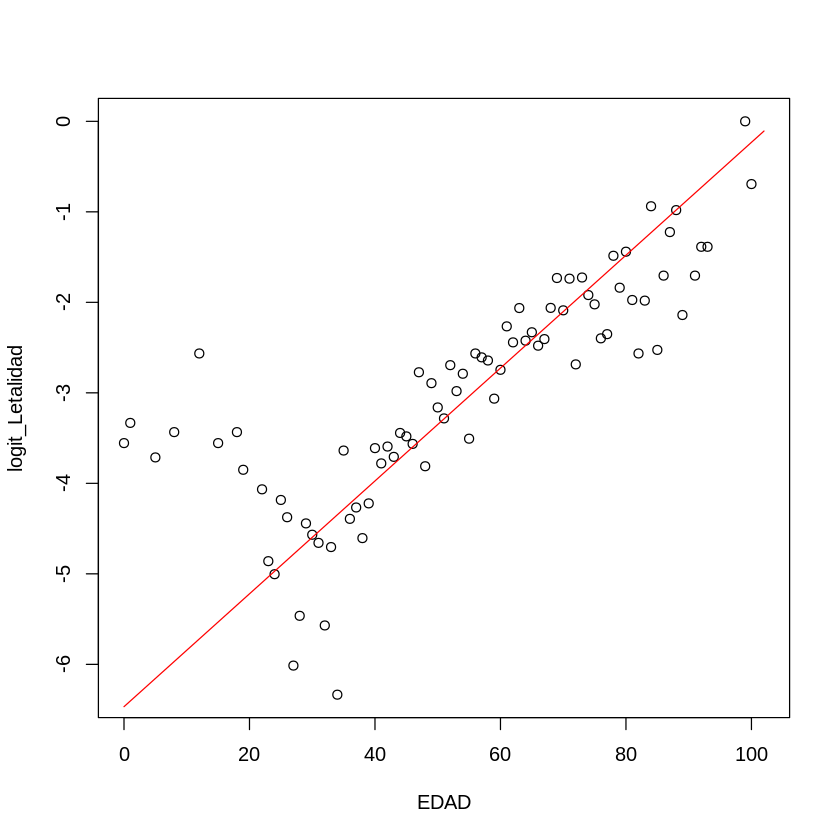

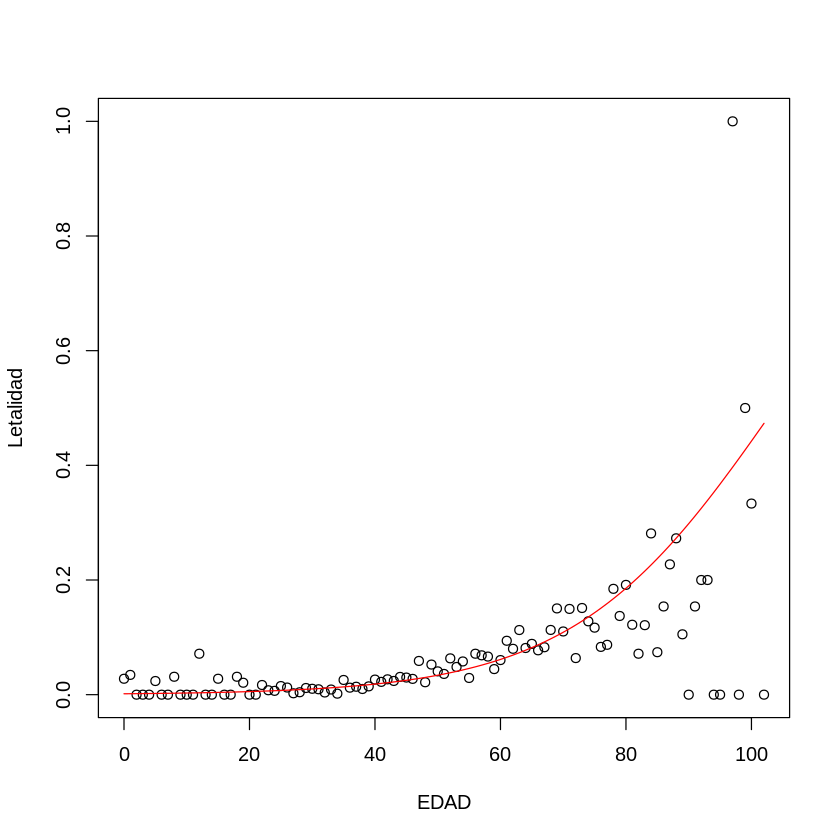

In [174]:
estimar_tasas(datos_actuales[datos_actuales$ENTIDAD_NAC_merge == "MÉXICO",])

[1] "==========================================================="
[1] "CIUDAD DE MÉXICO"


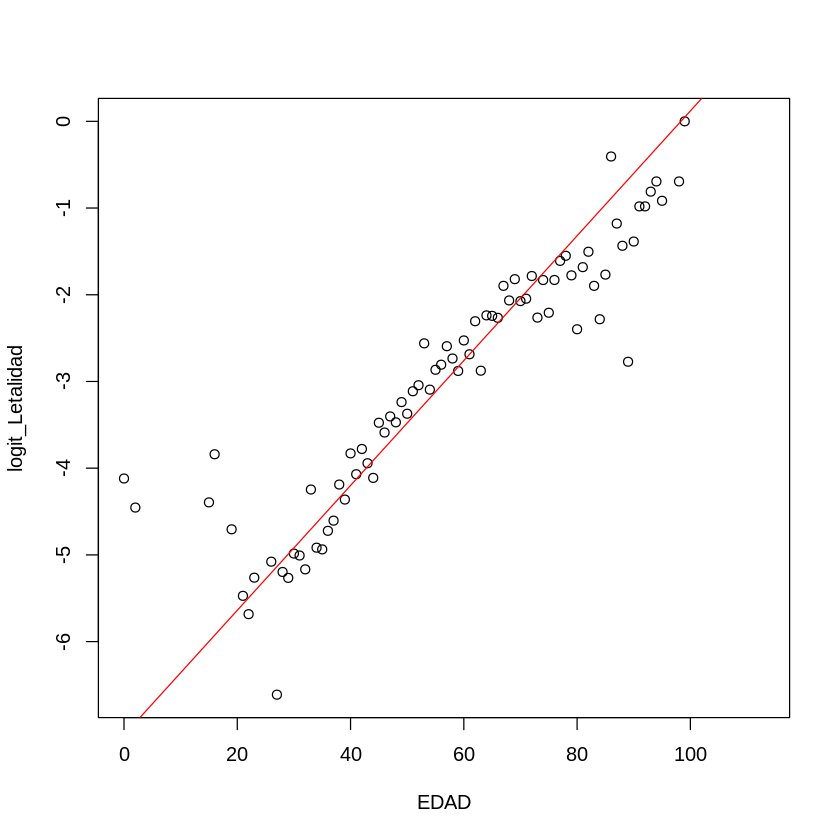

[1] "==========================================================="
[1] "MÉXICO"


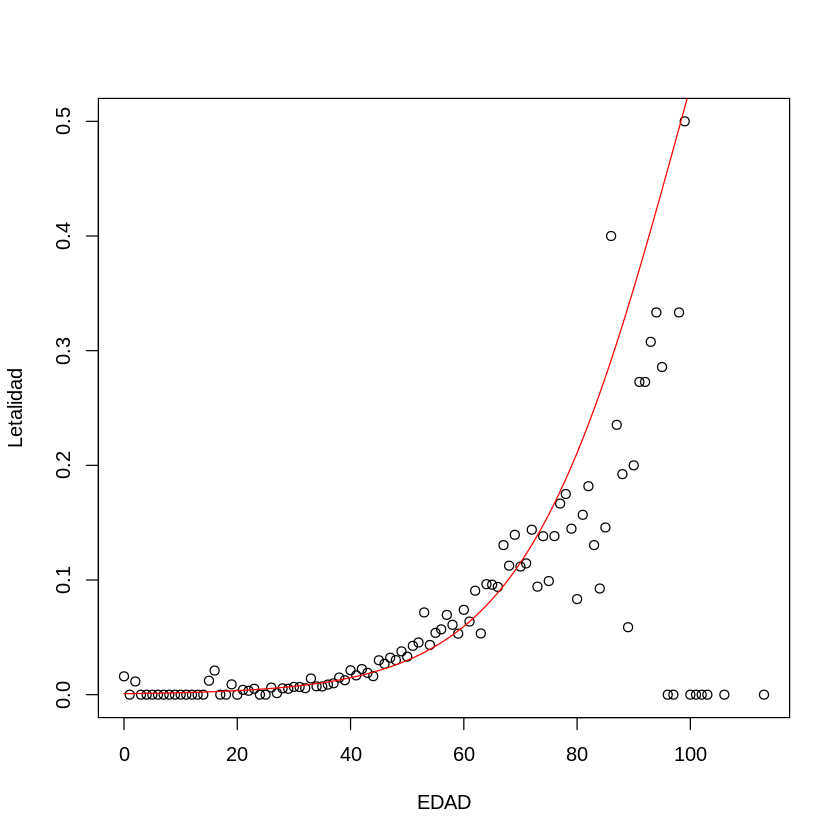

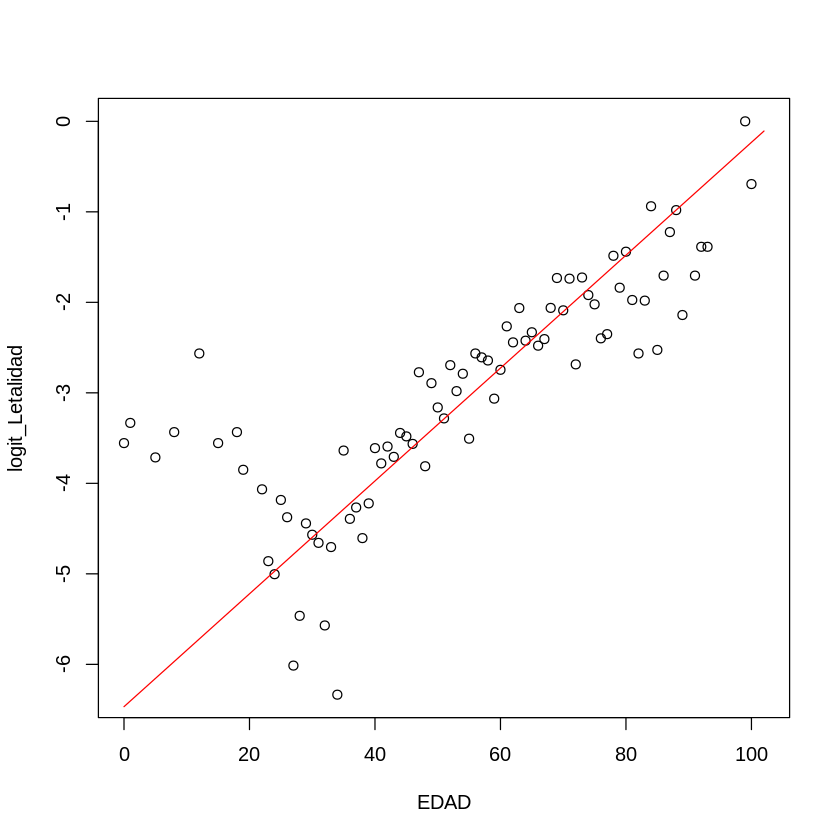

[1] "==========================================================="
[1] "VERACRUZ DE IGNACIO DE LA LLAVE"


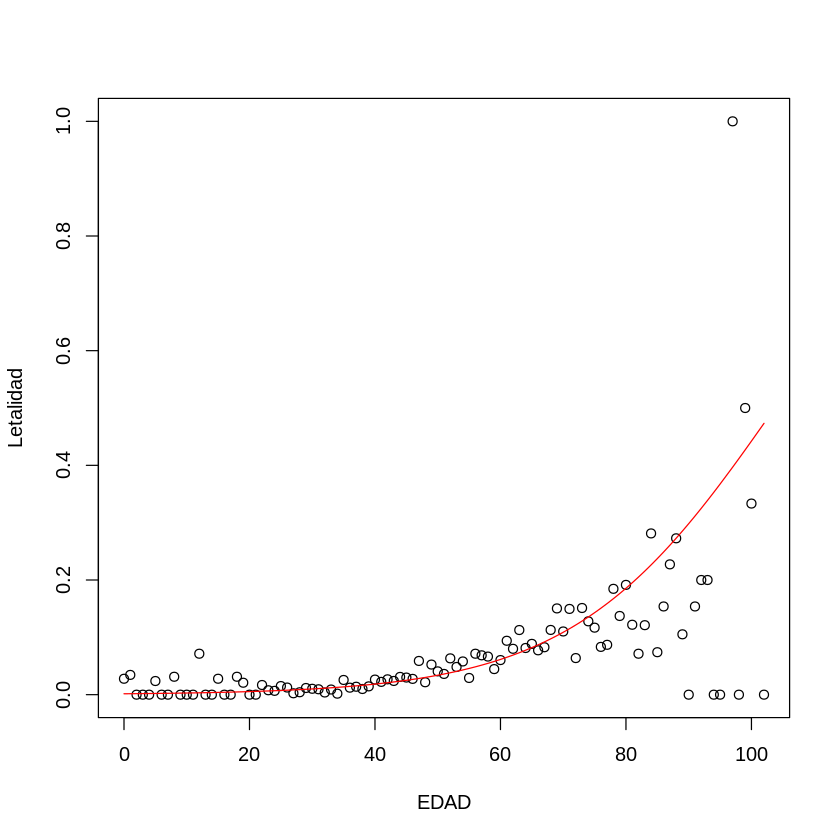

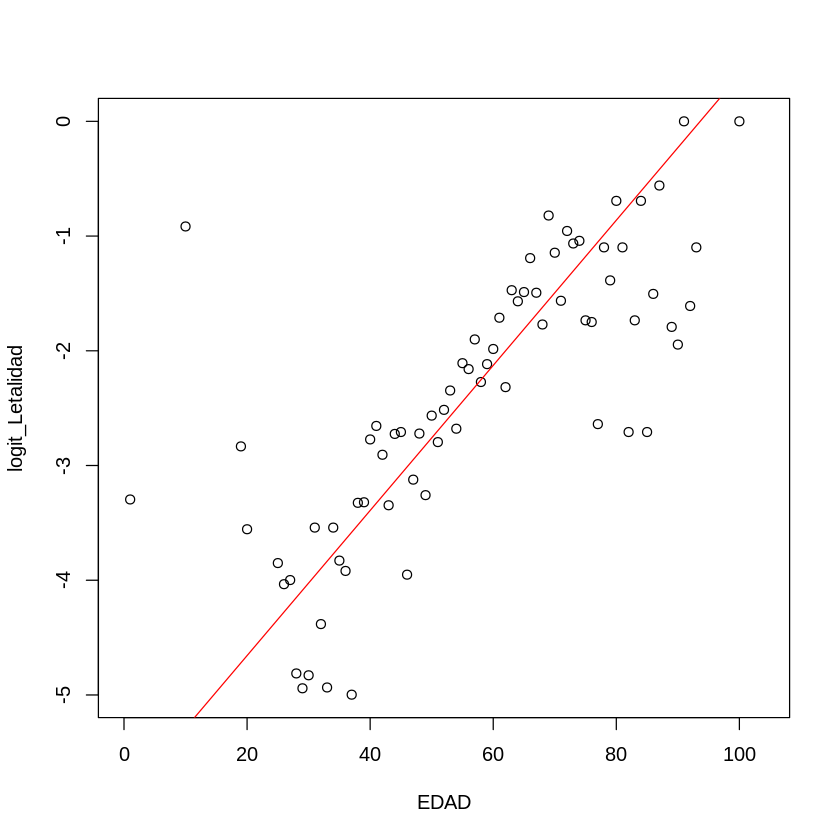

[1] "==========================================================="
[1] "SINALOA"


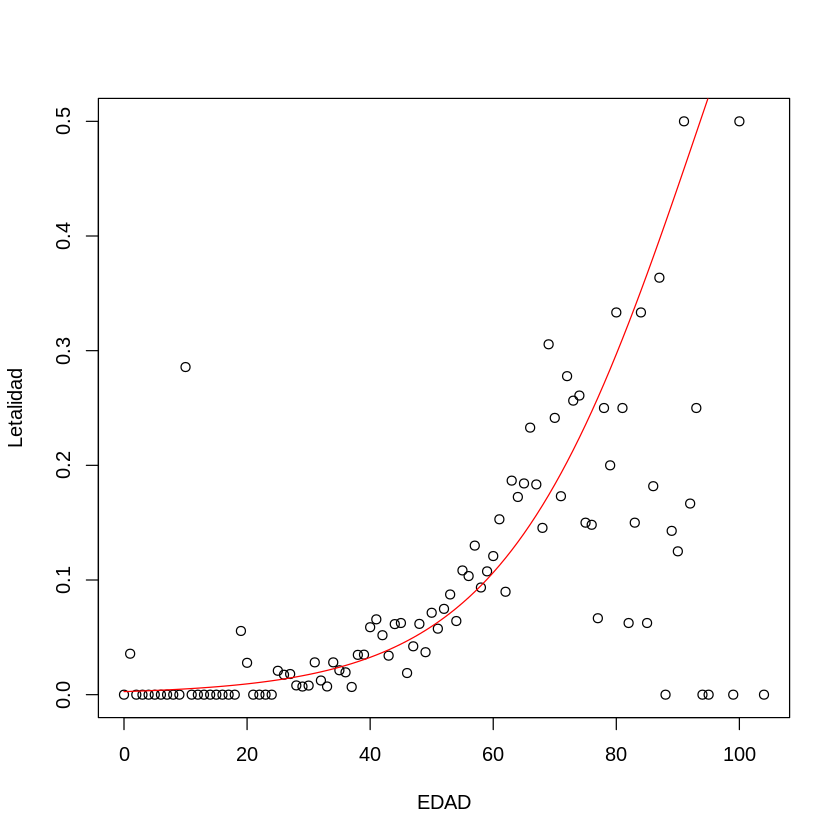

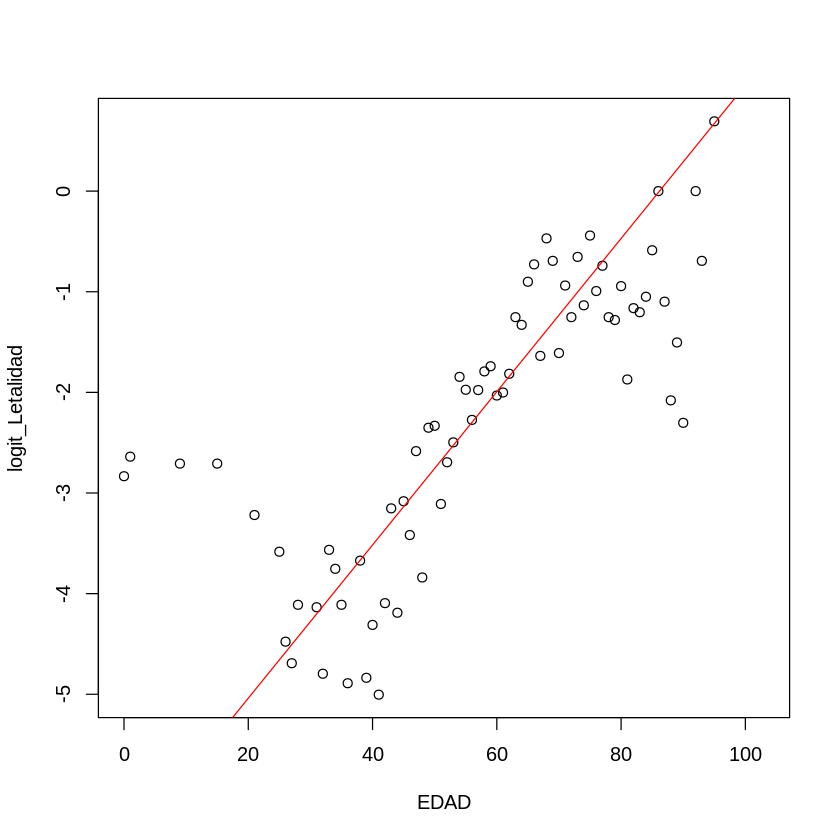

[1] "==========================================================="
[1] "TABASCO"


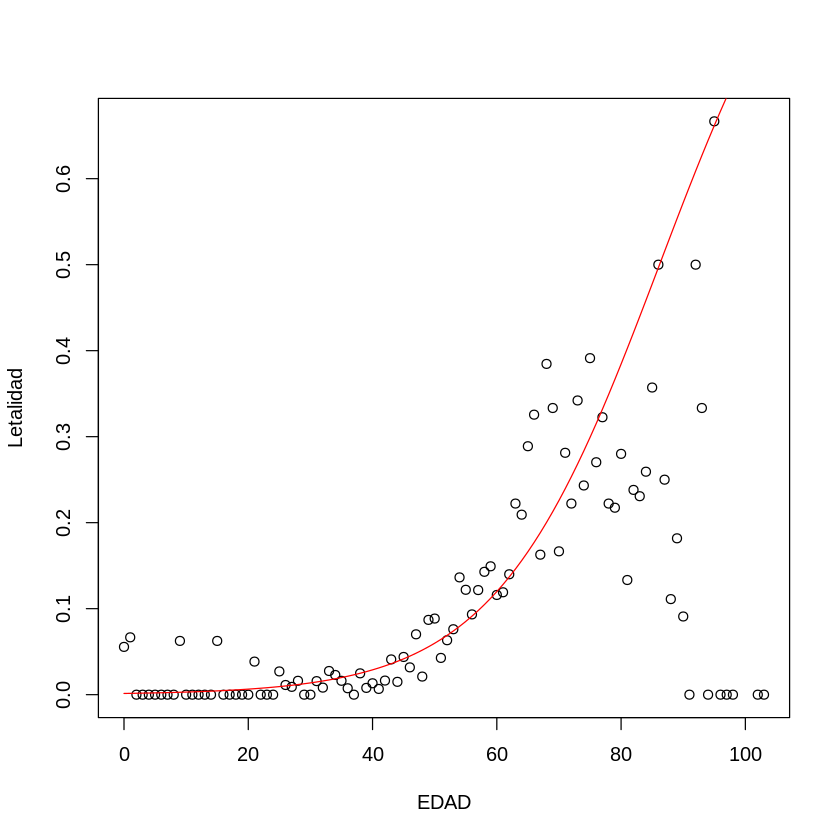

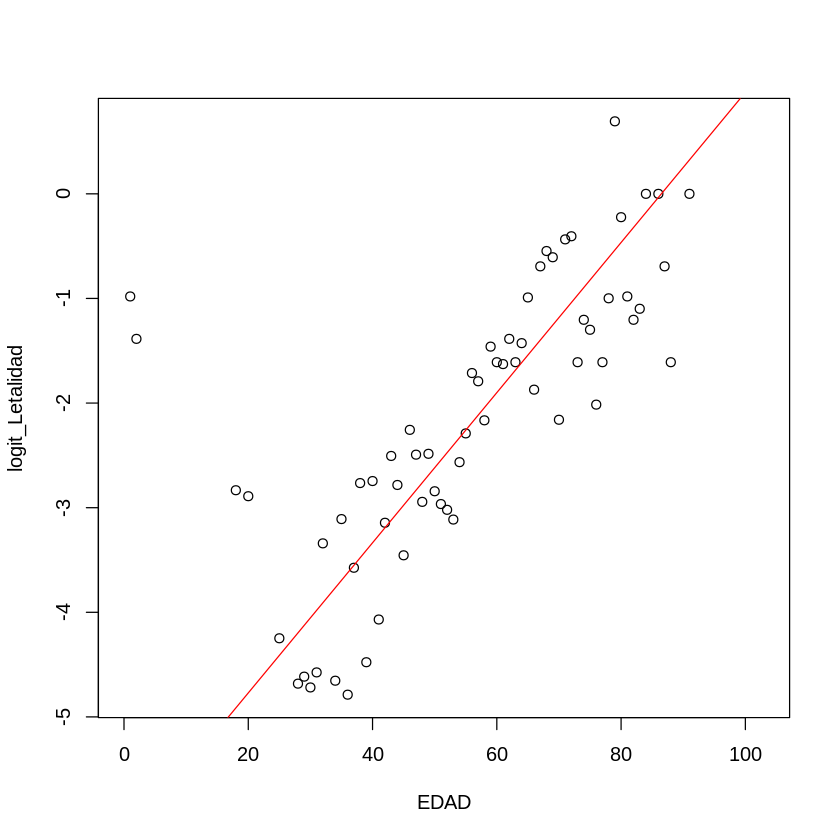

[1] "==========================================================="
[1] "PUEBLA"


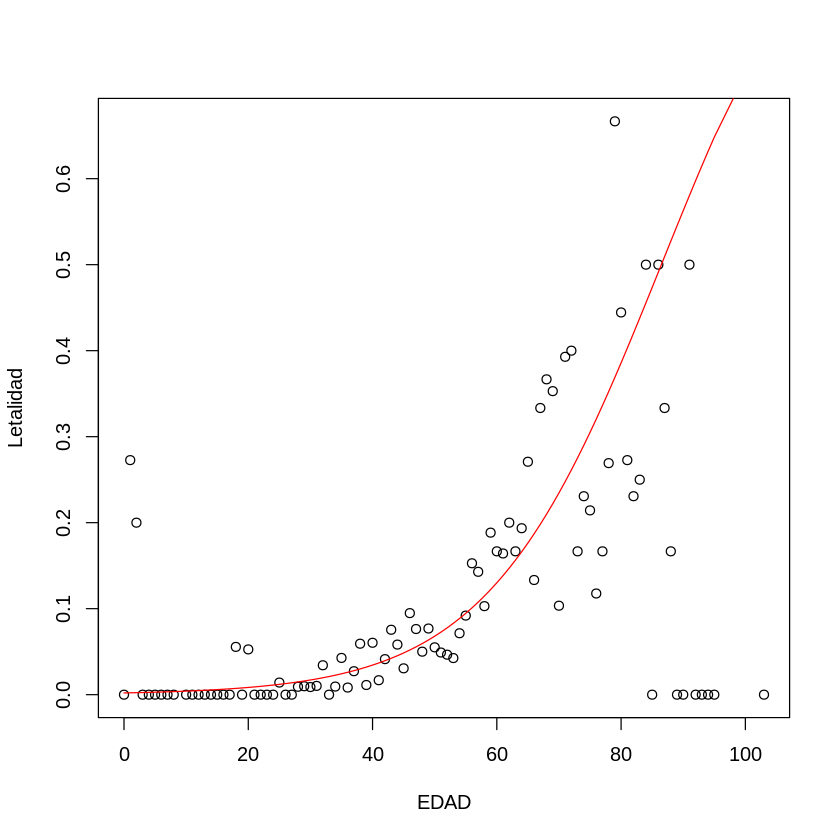

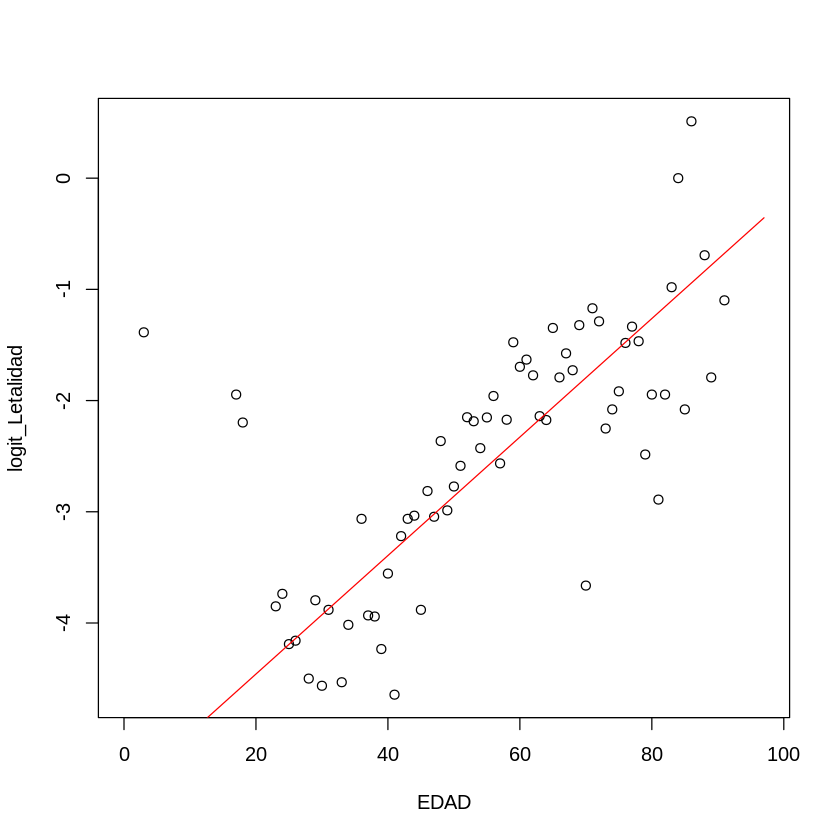

[1] "==========================================================="
[1] "BAJA CALIFORNIA"


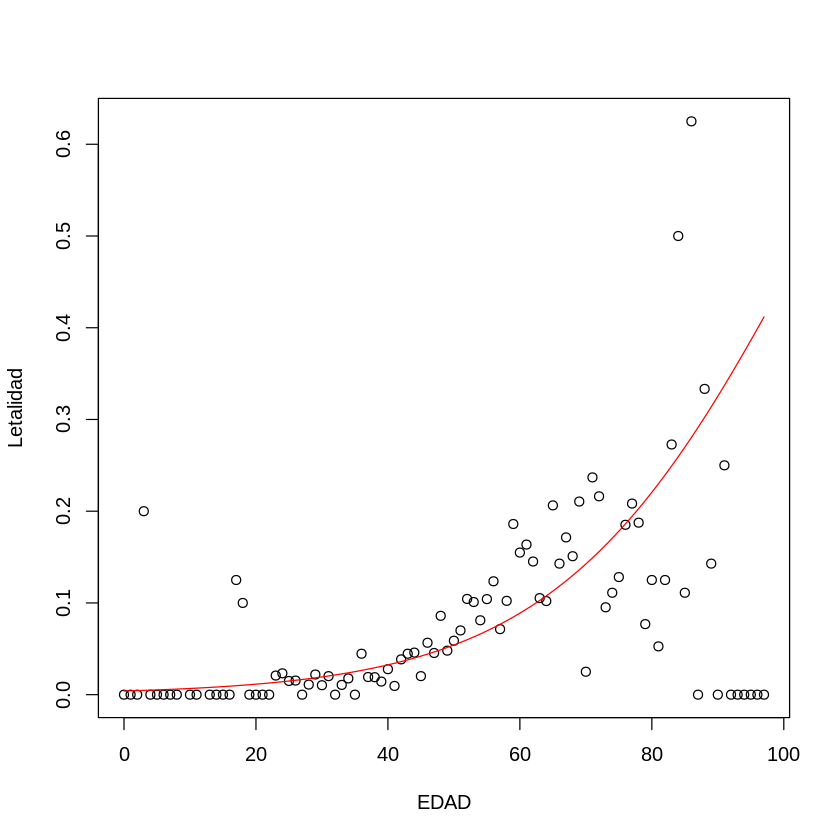

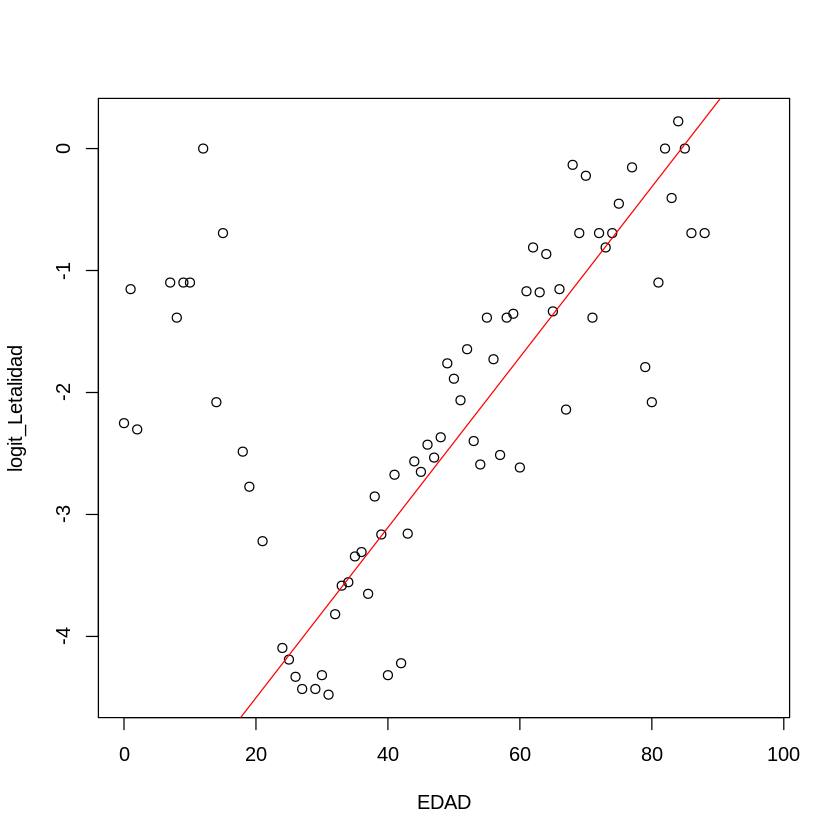

[1] "==========================================================="
[1] "OAXACA"


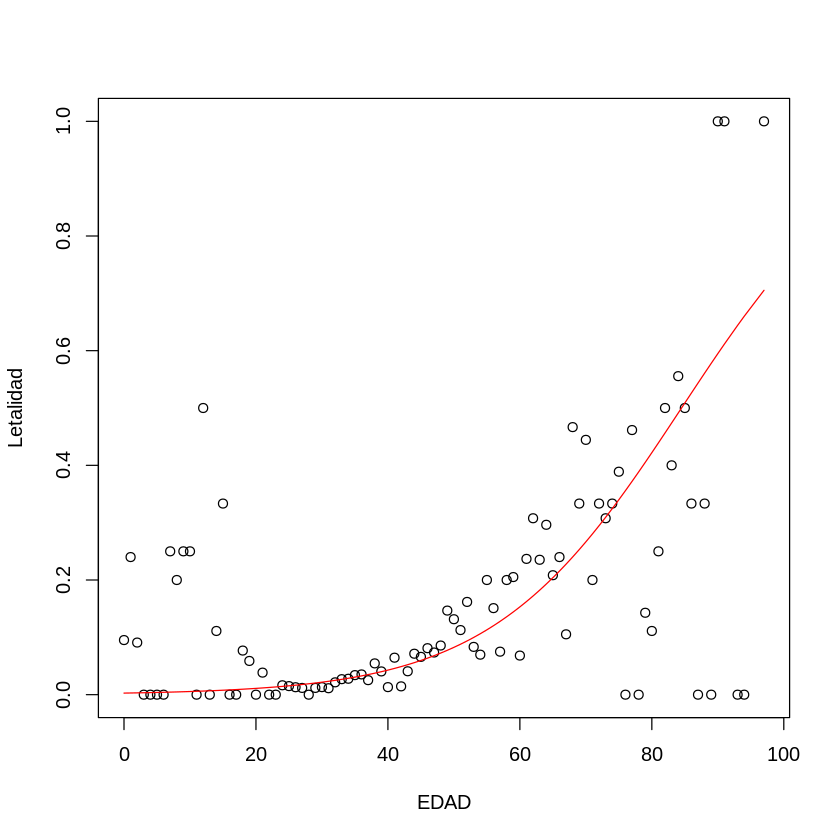

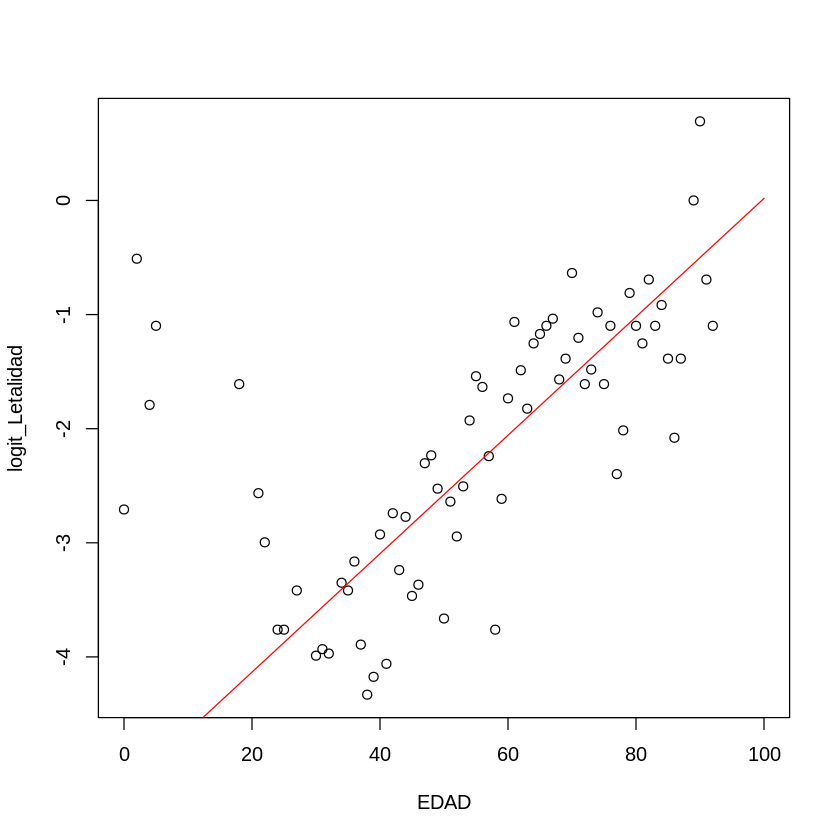

[1] "==========================================================="
[1] "GUERRERO"


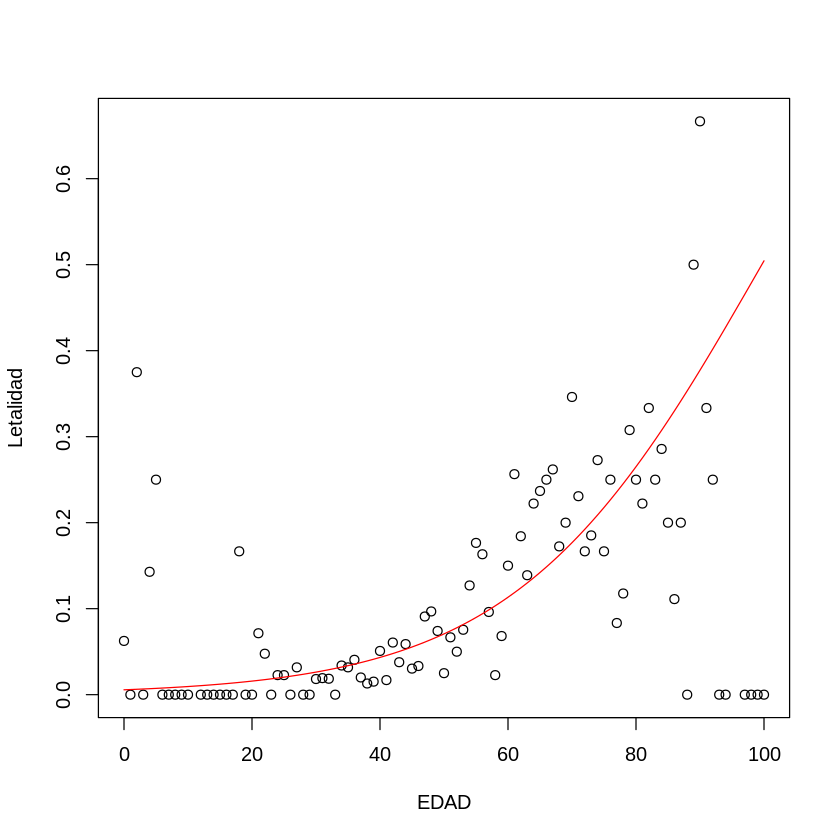

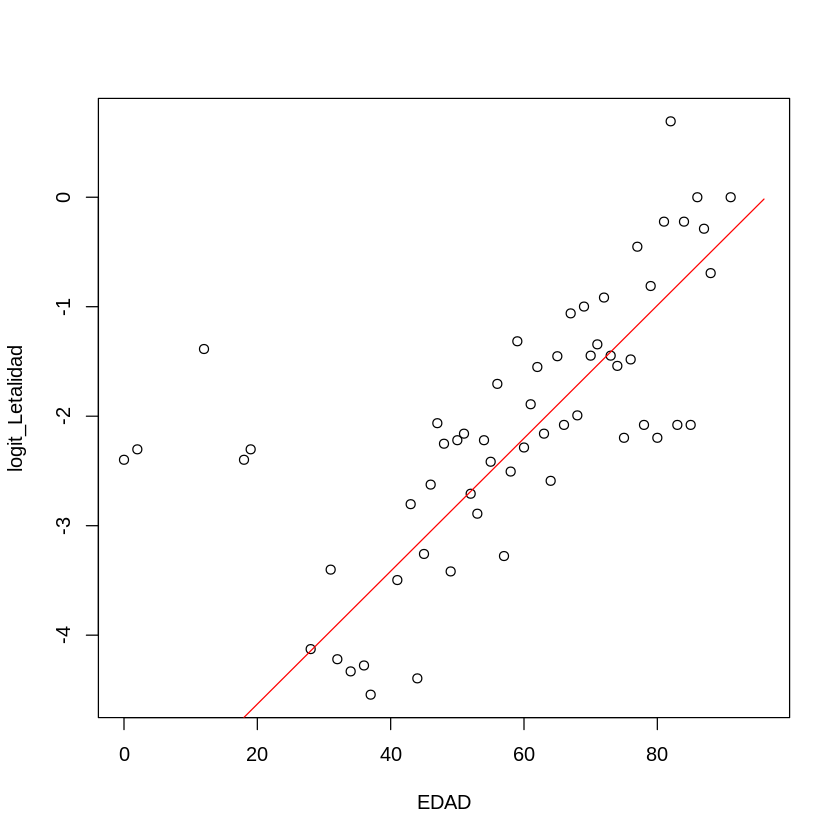

[1] "==========================================================="
[1] "JALISCO"


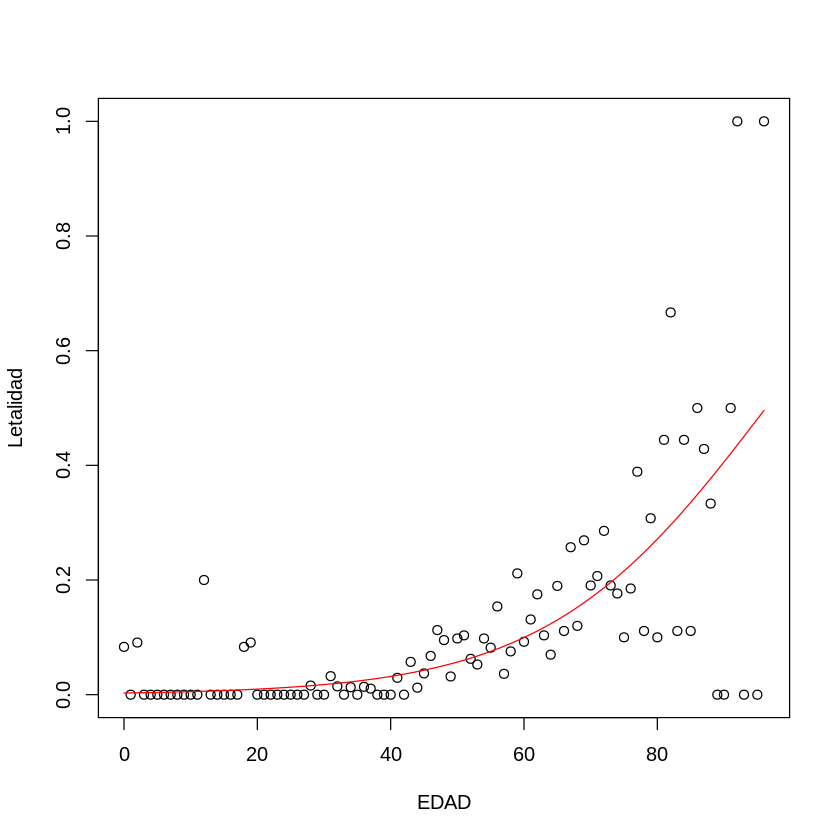

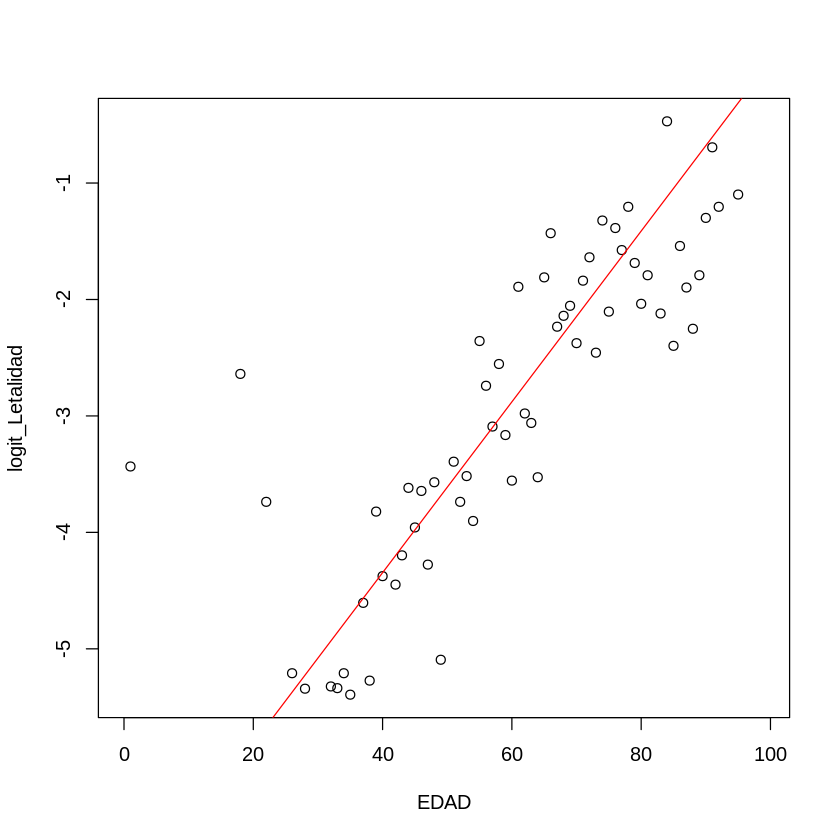

[1] "==========================================================="
[1] "YUCATÁN"


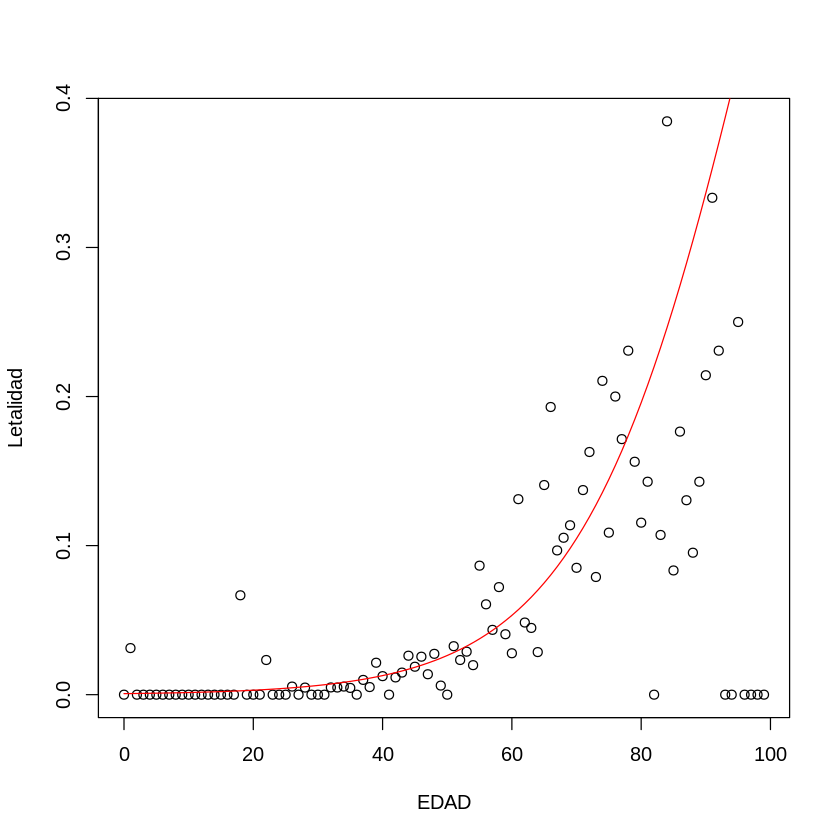

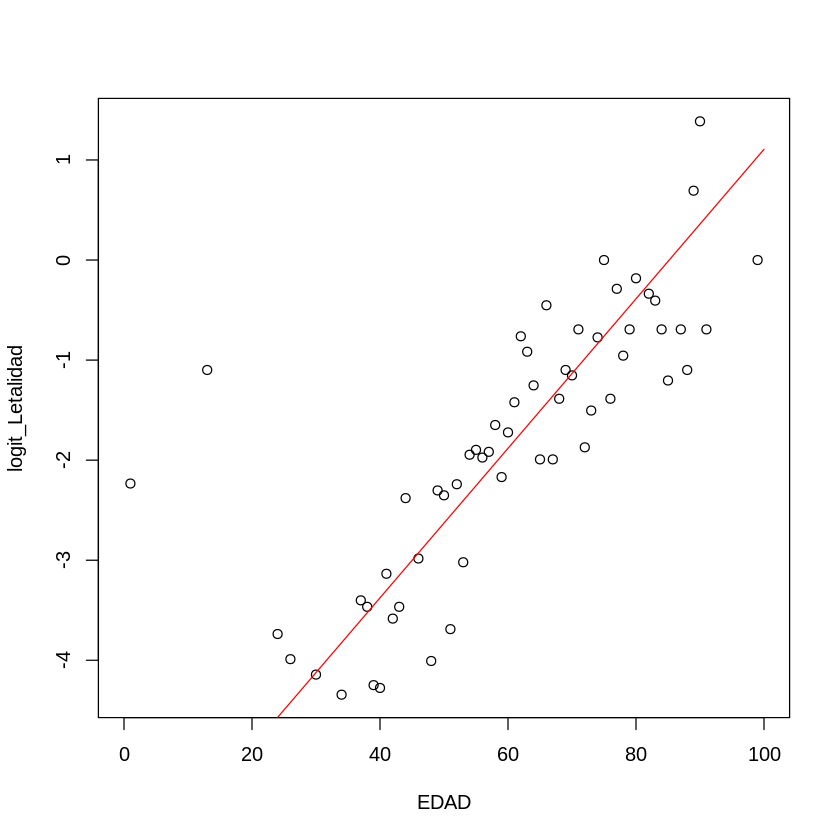

[1] "==========================================================="
[1] "MICHOACÁN DE OCAMPO"


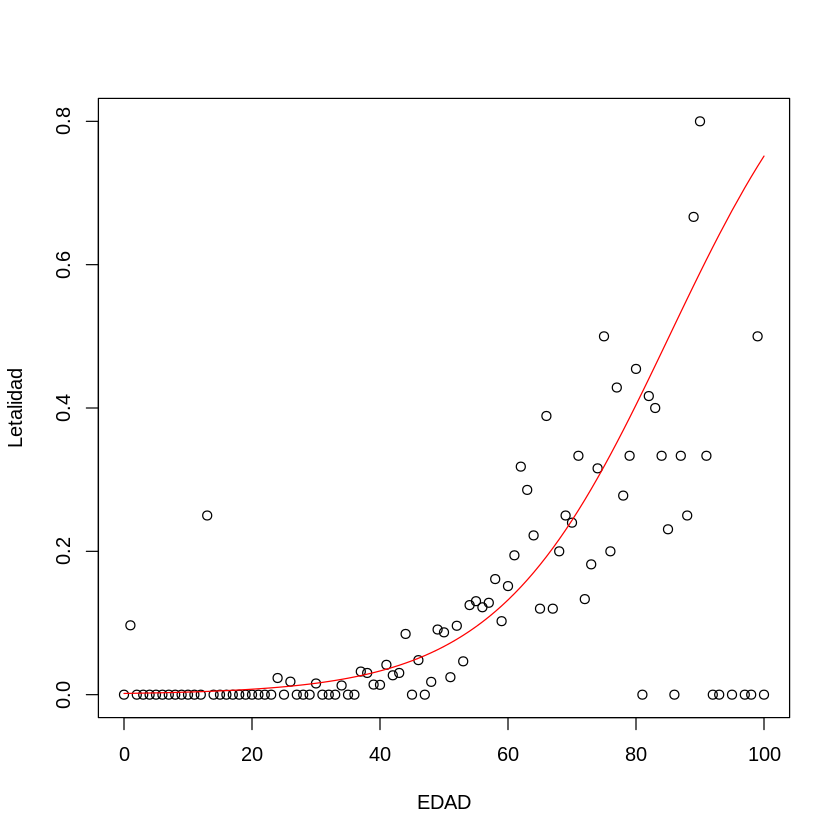

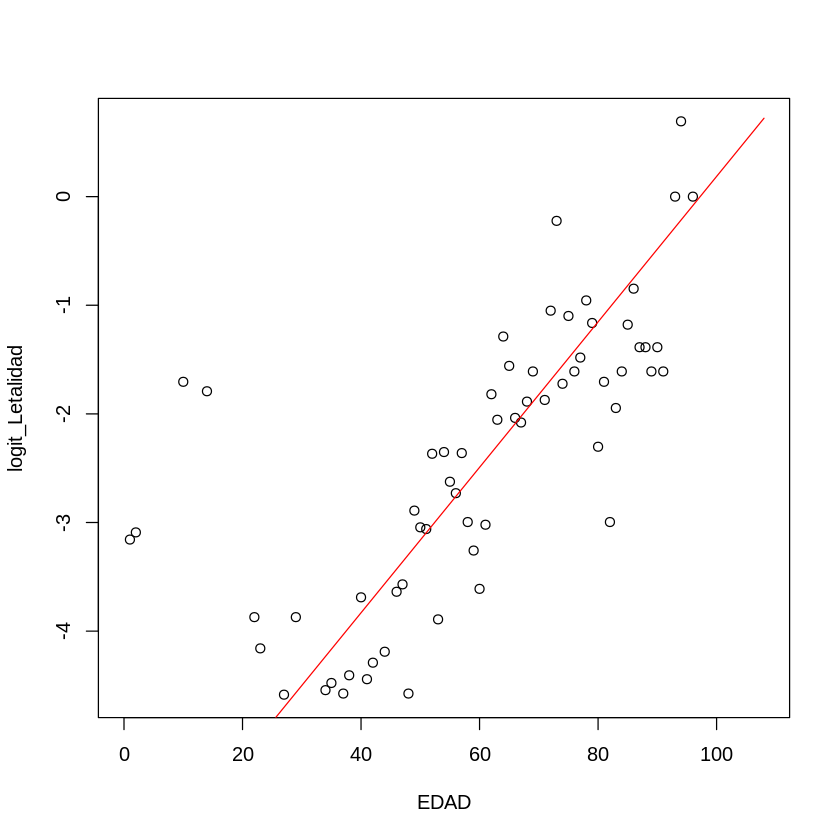

[1] "==========================================================="
[1] "GUANAJUATO"


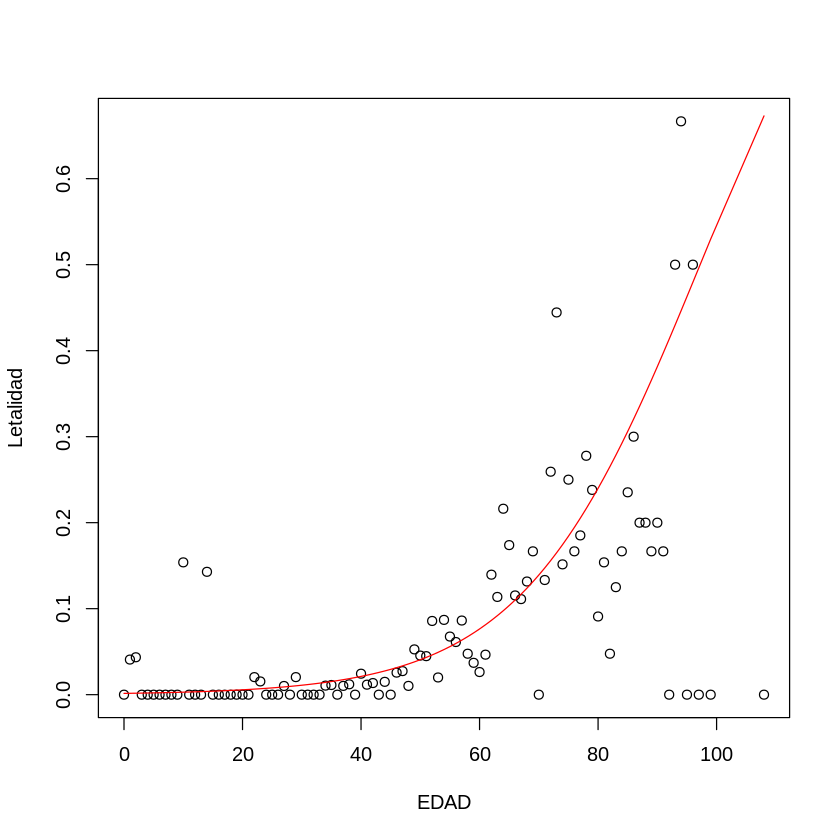

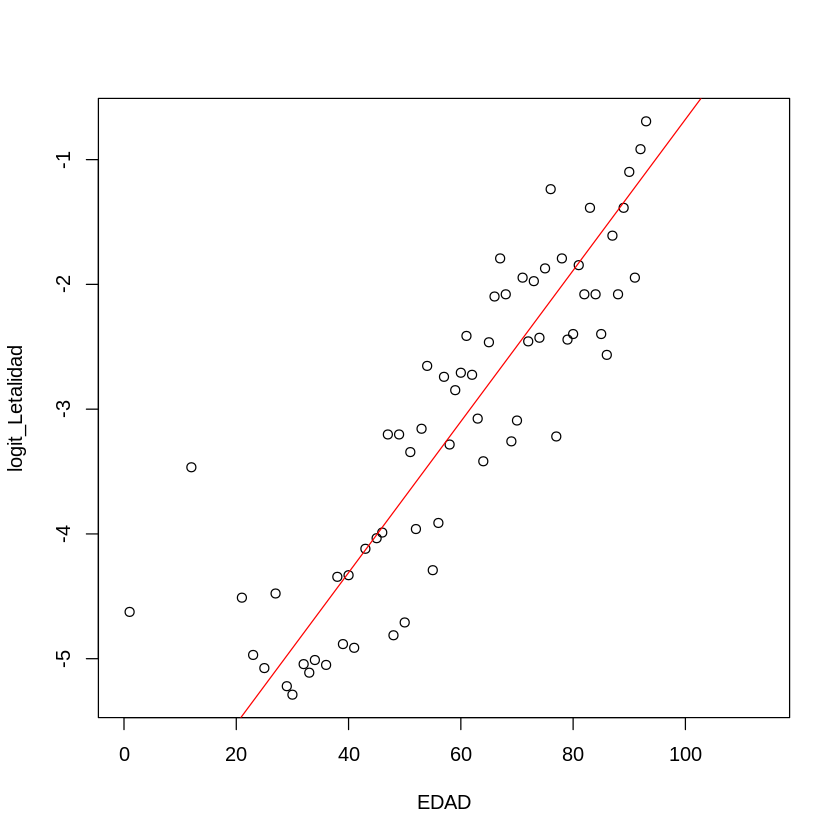

[1] "==========================================================="
[1] "CHIHUAHUA"


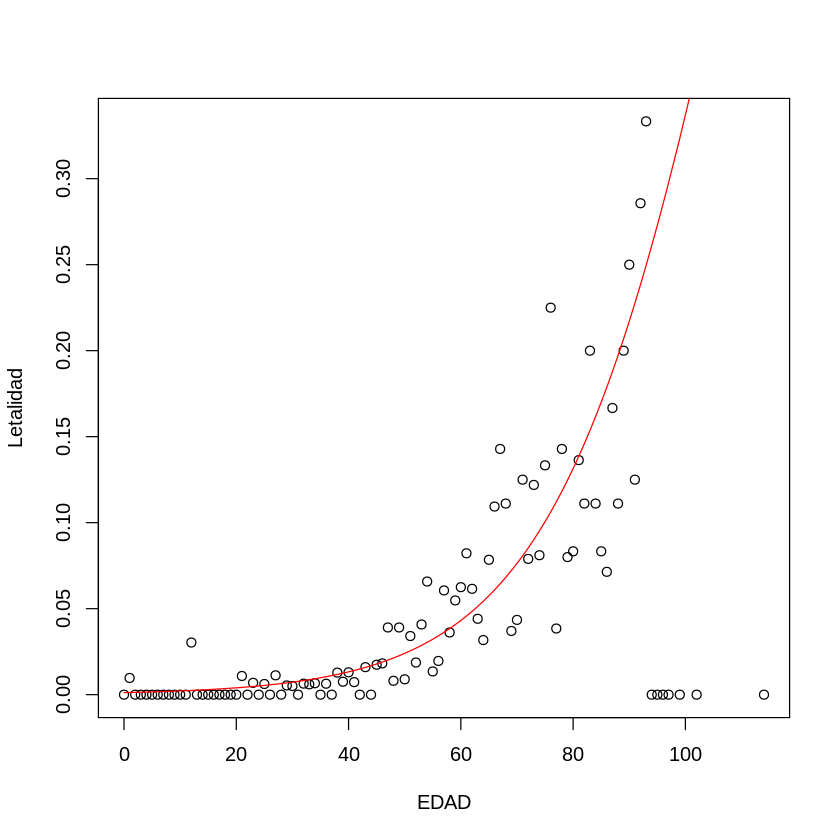

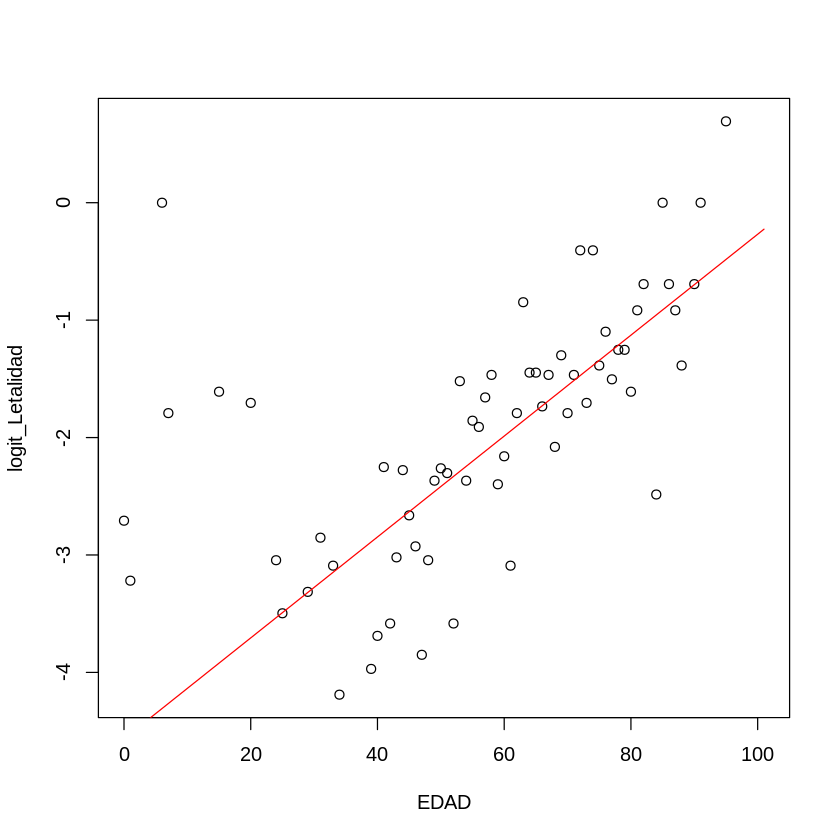

[1] "==========================================================="
[1] "HIDALGO"


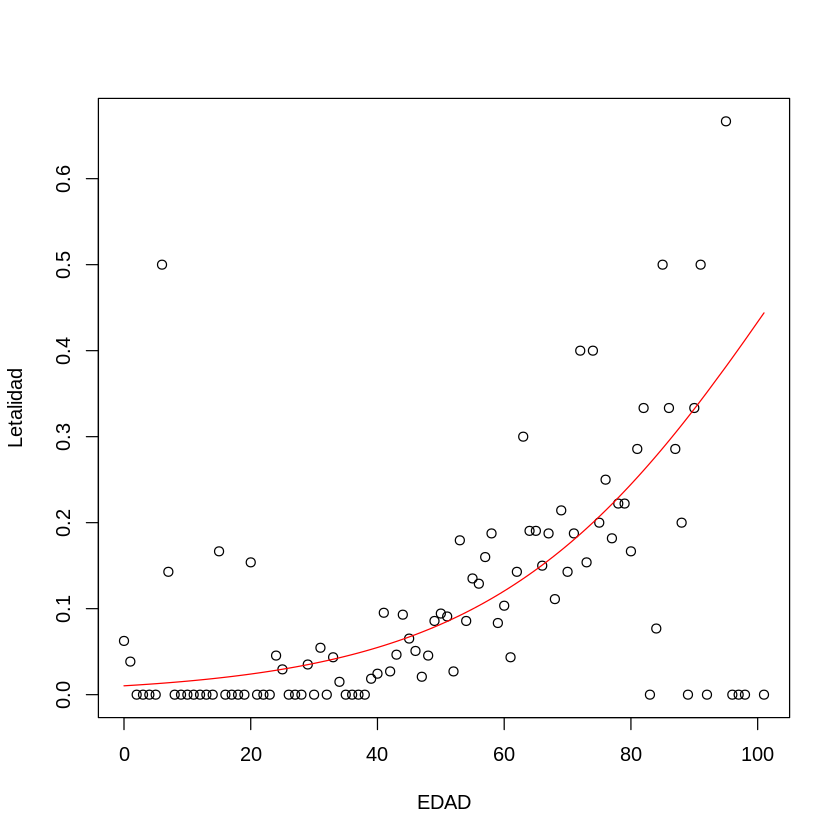

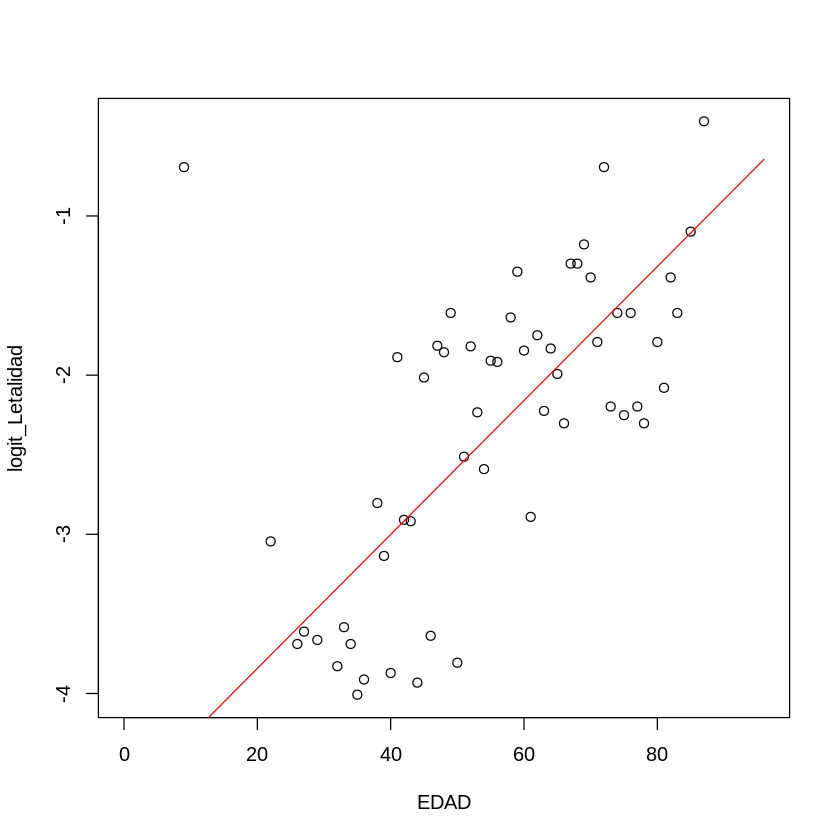

[1] "==========================================================="
[1] "COAHUILA DE ZARAGOZA"


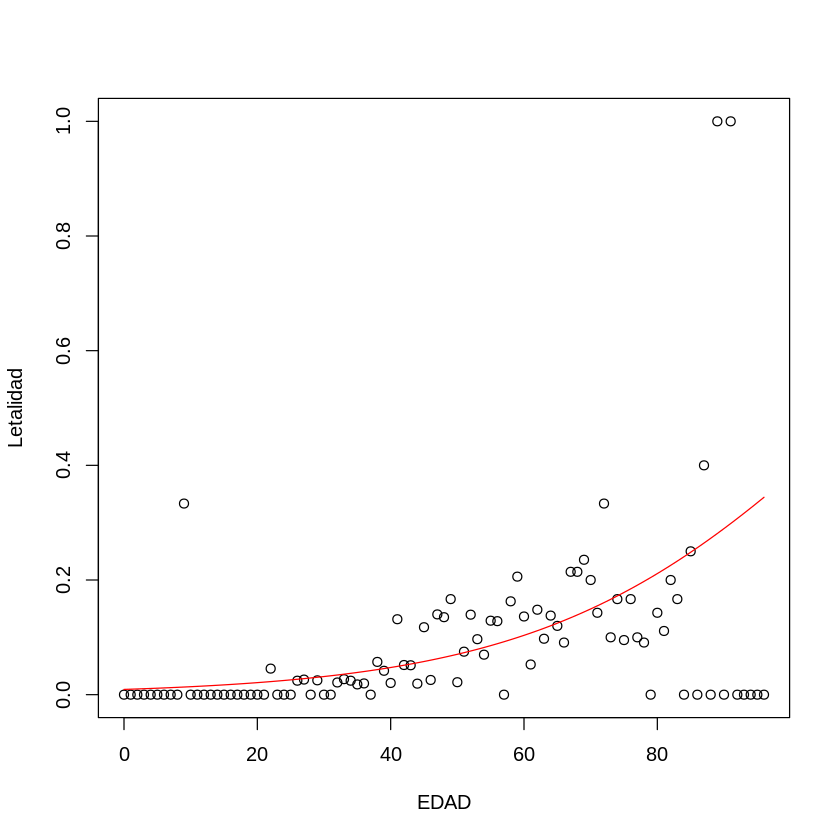

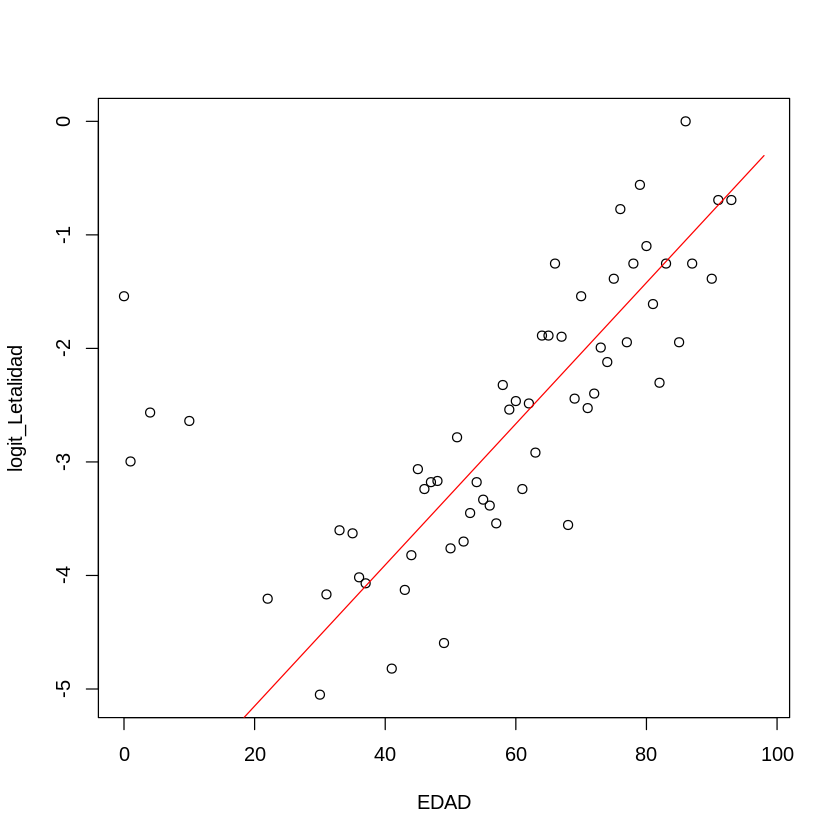

[1] "==========================================================="
[1] "MORELOS"


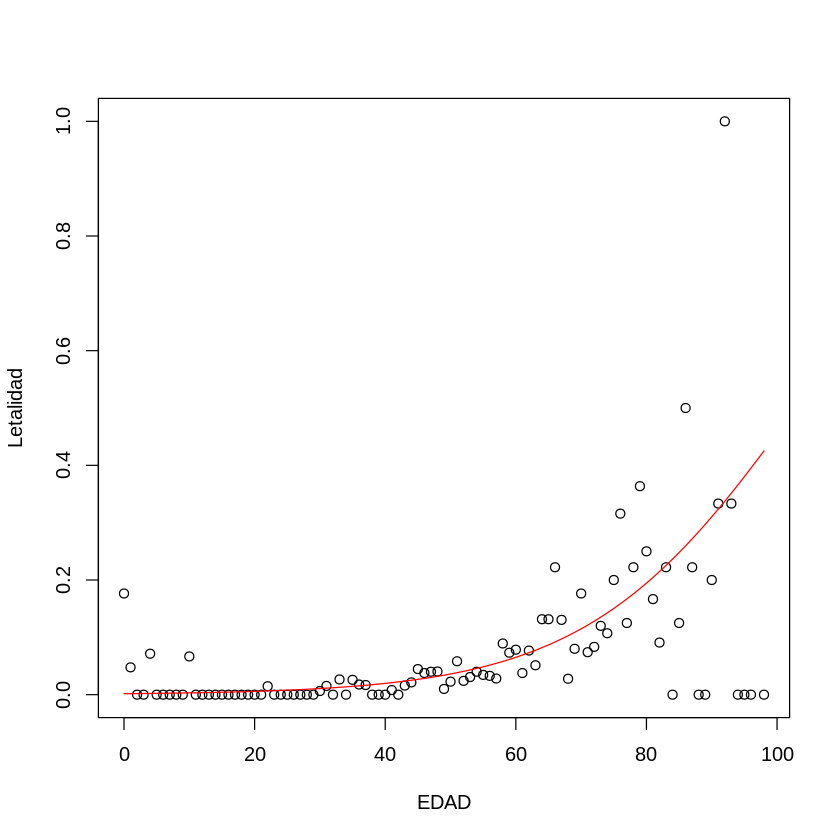

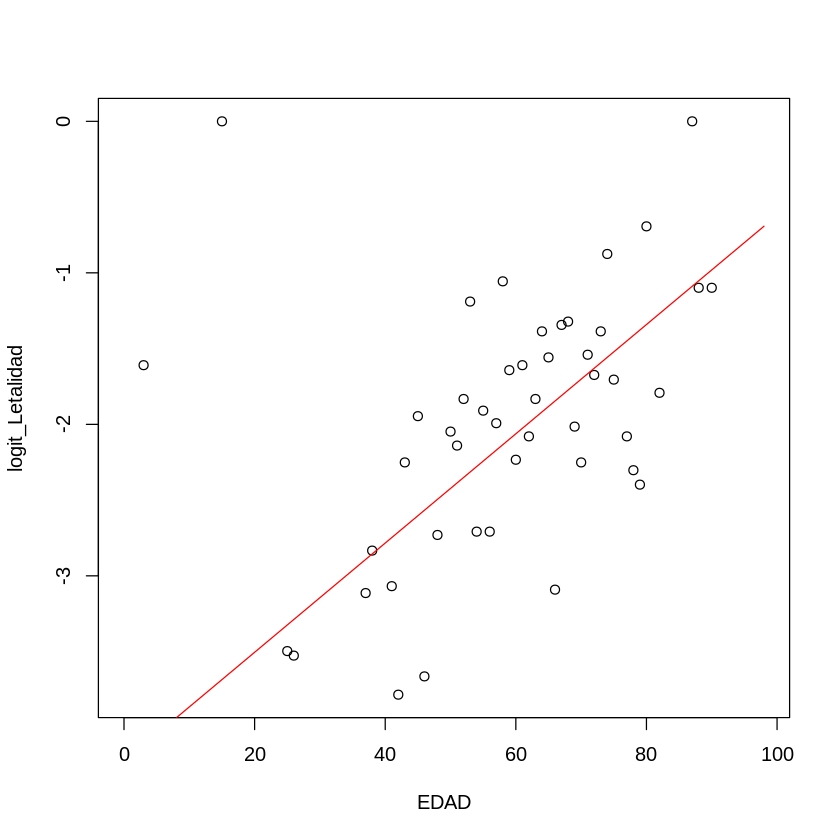

[1] "==========================================================="
[1] "CHIAPAS"


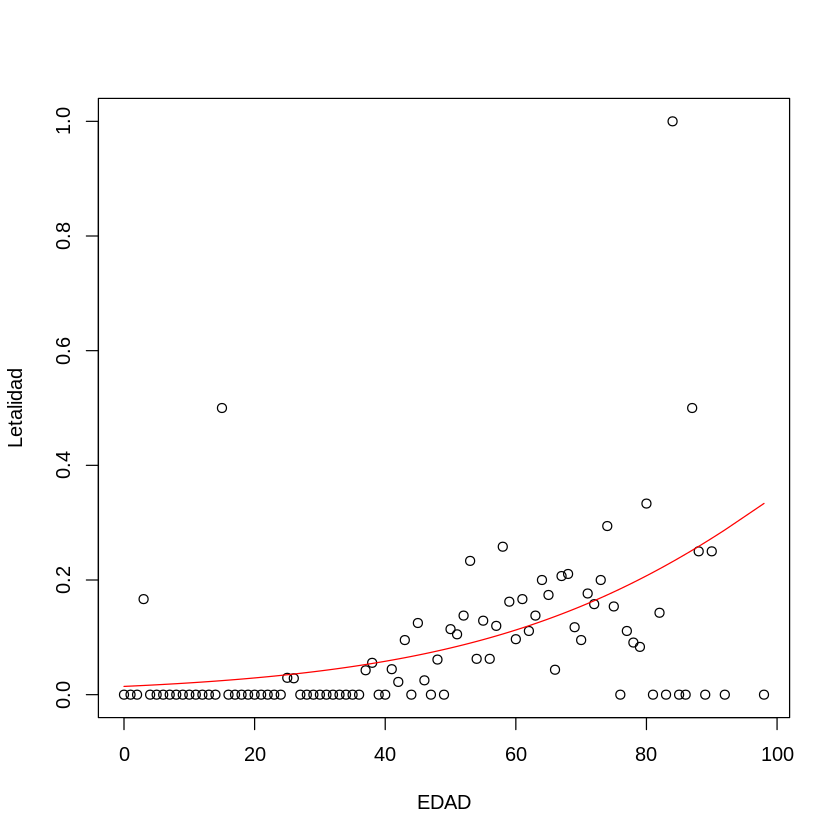

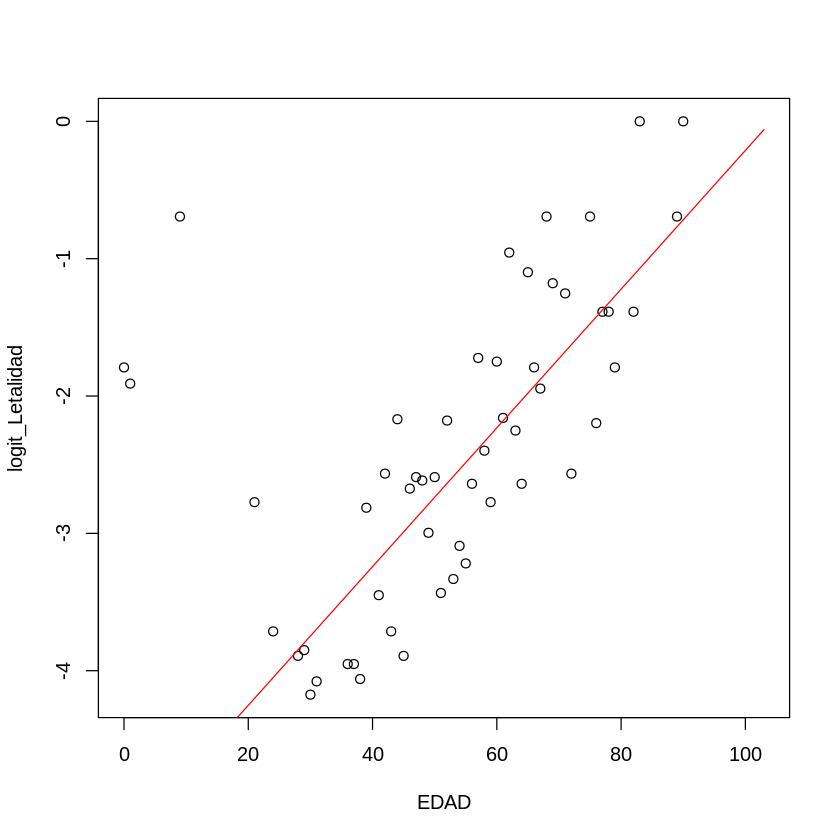

[1] "==========================================================="
[1] "SONORA"


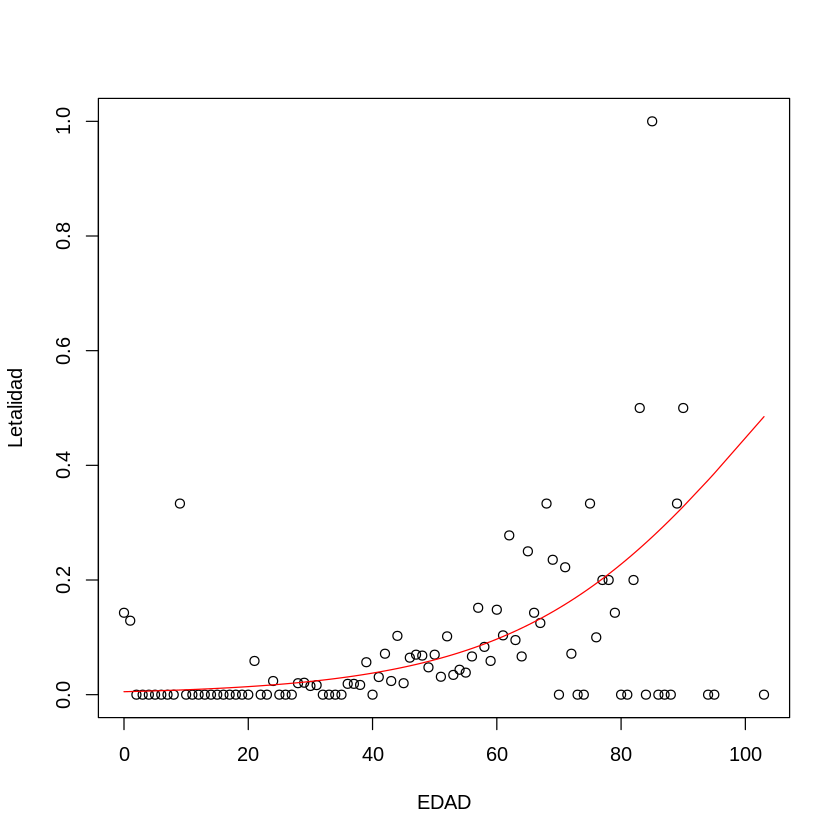

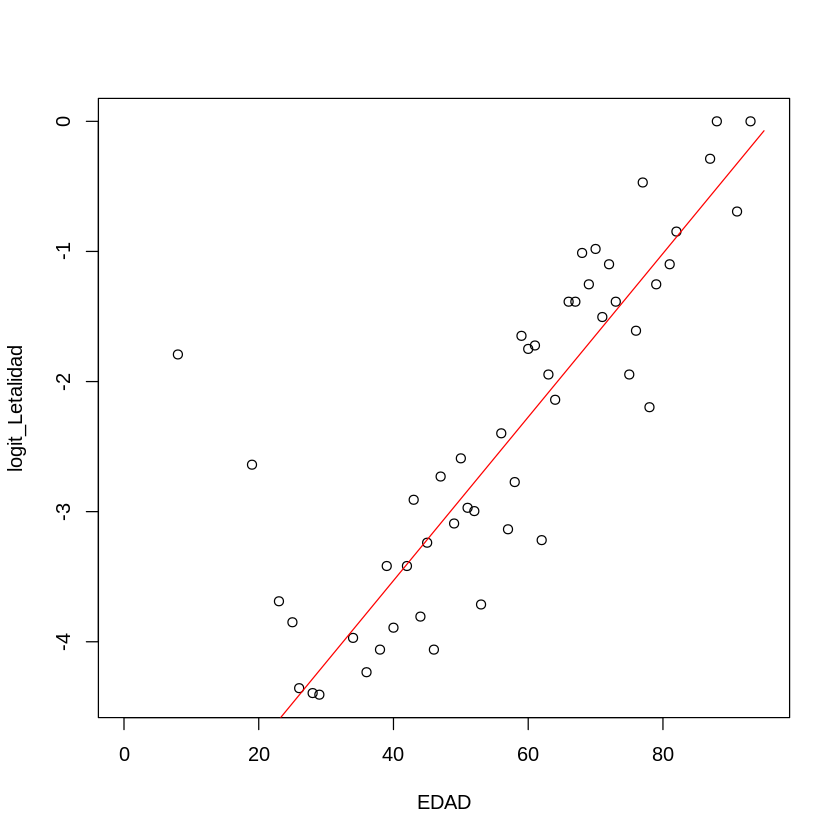

[1] "==========================================================="
[1] "TLAXCALA"


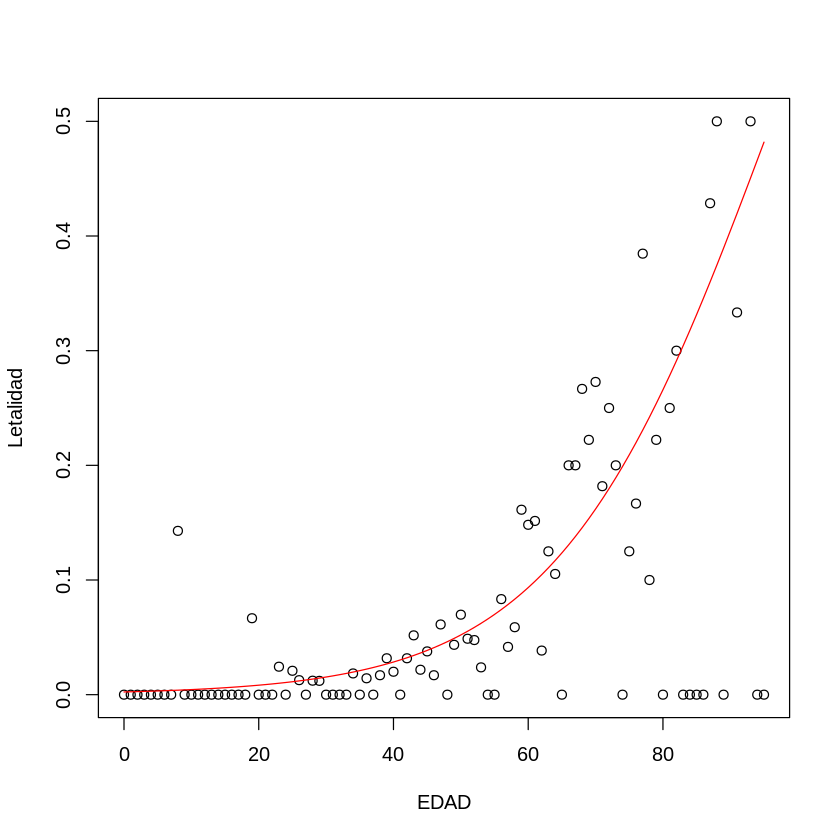

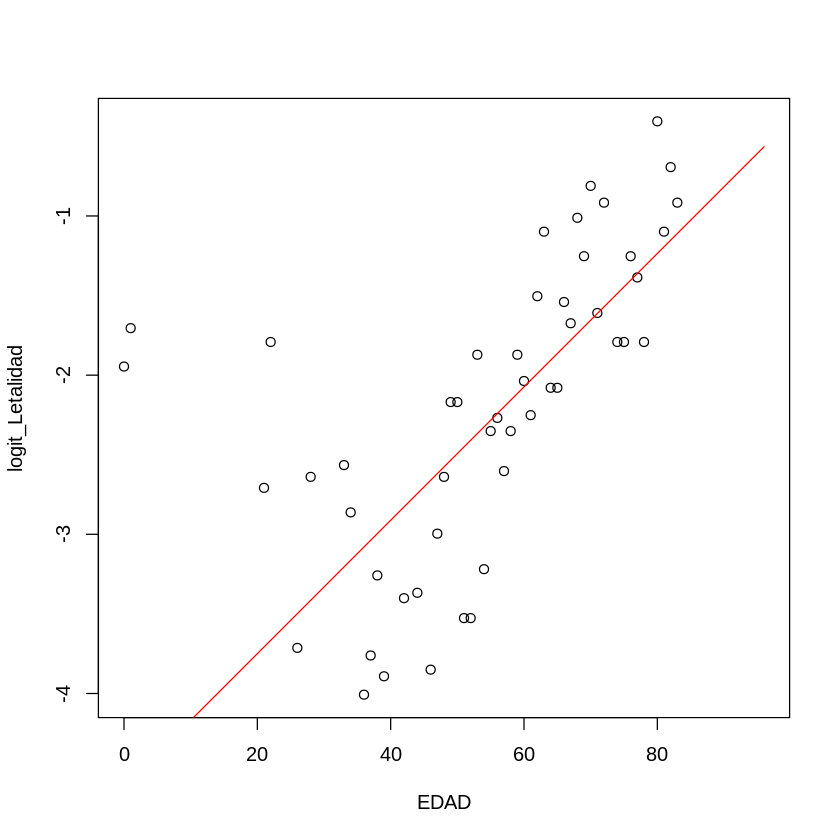

[1] "==========================================================="
[1] "TAMAULIPAS"


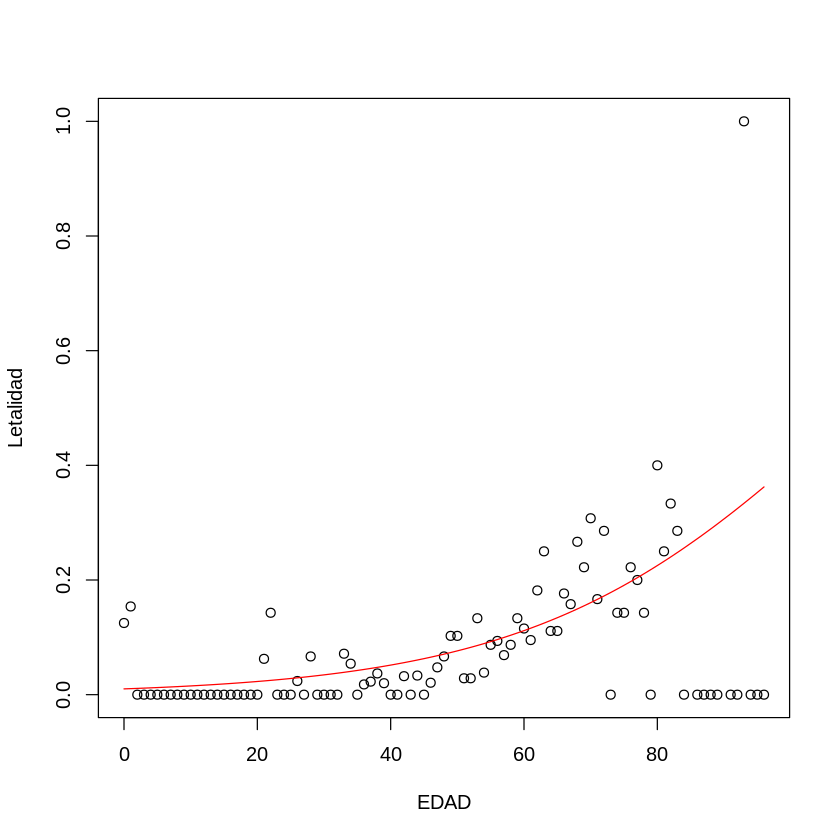

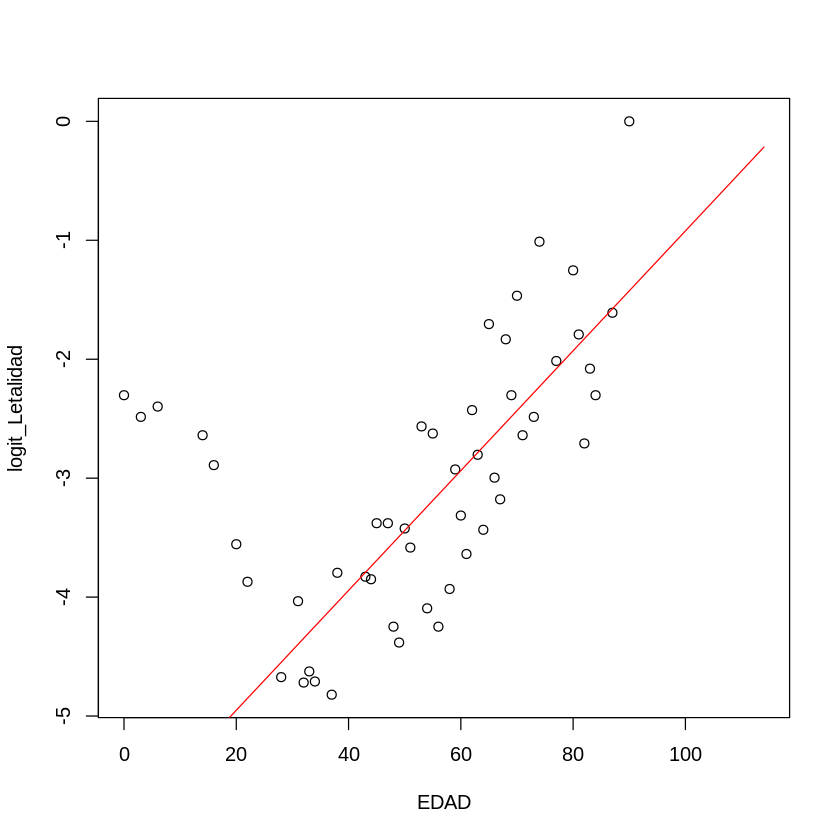

[1] "==========================================================="
[1] "SAN LUIS POTOSÍ"


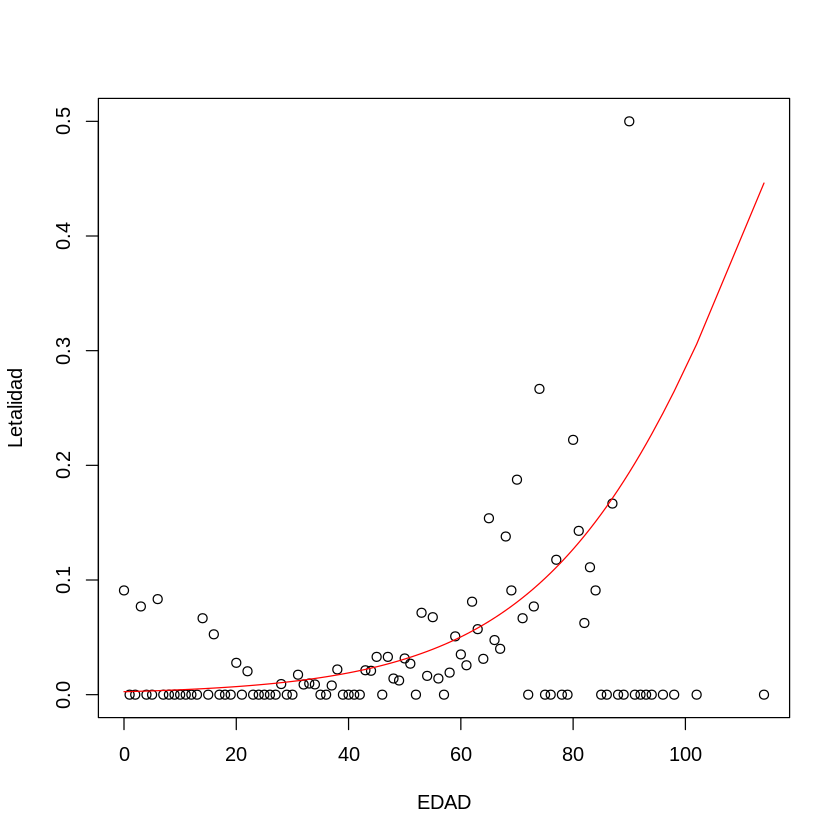

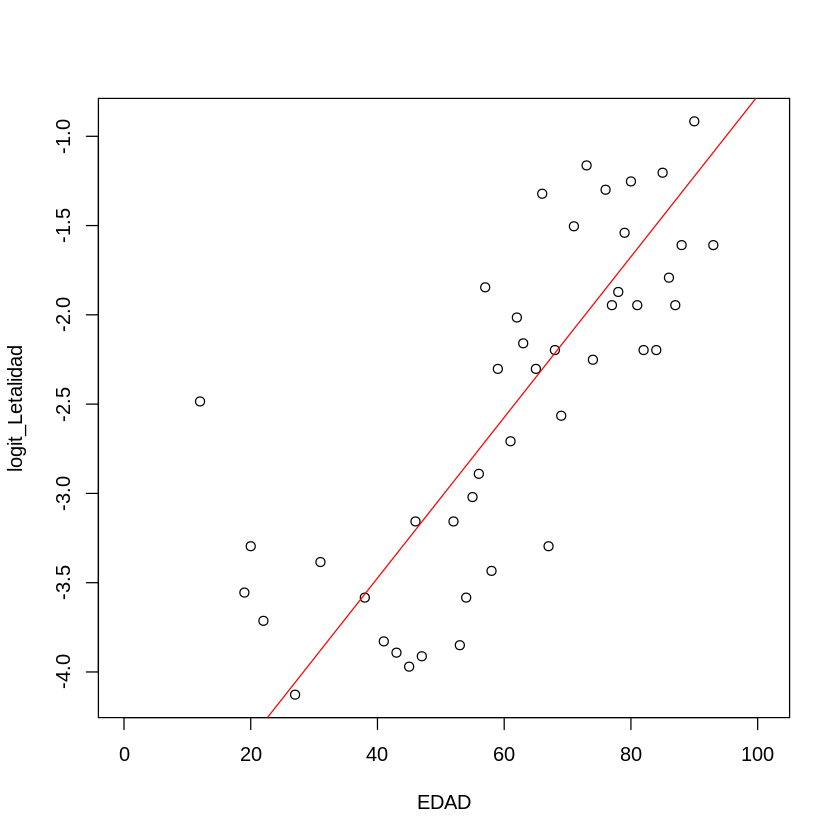

[1] "==========================================================="
[1] "ZACATECAS"


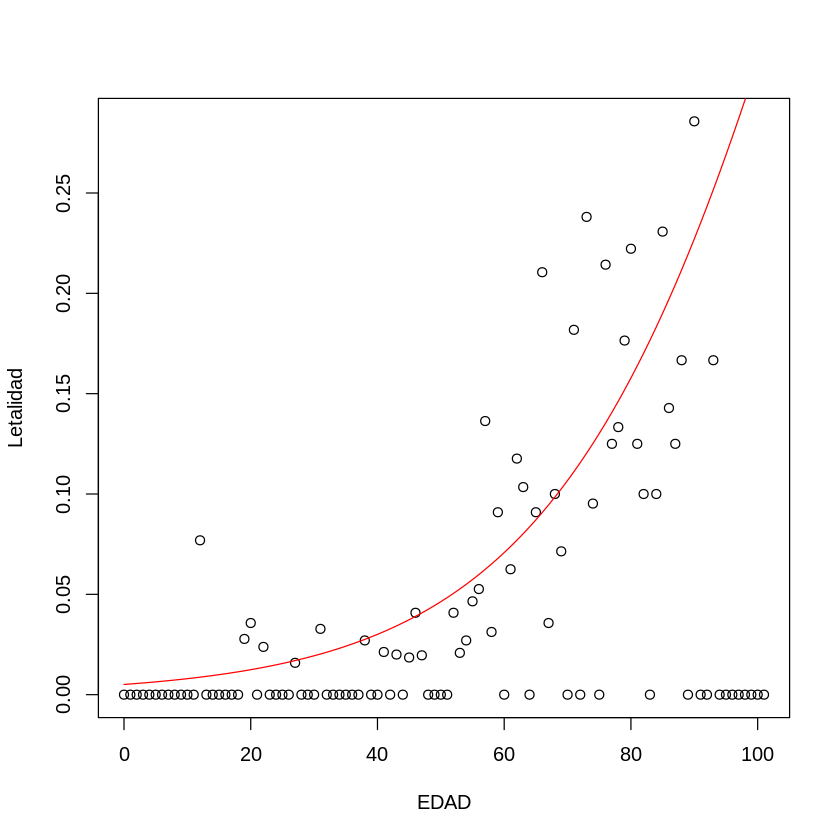

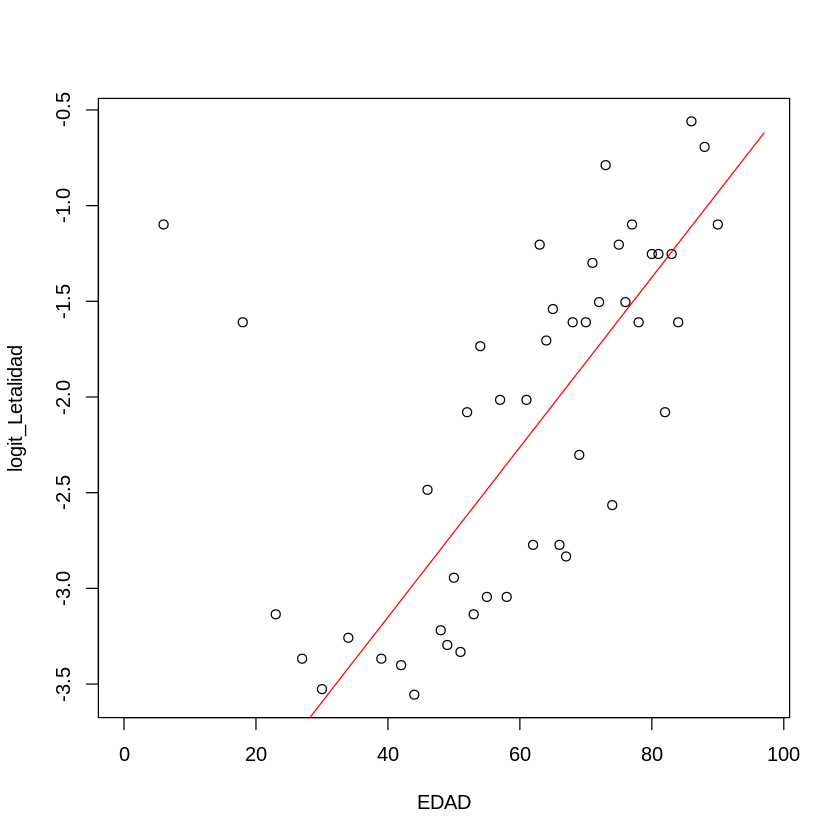

[1] "==========================================================="
[1] "DURANGO"


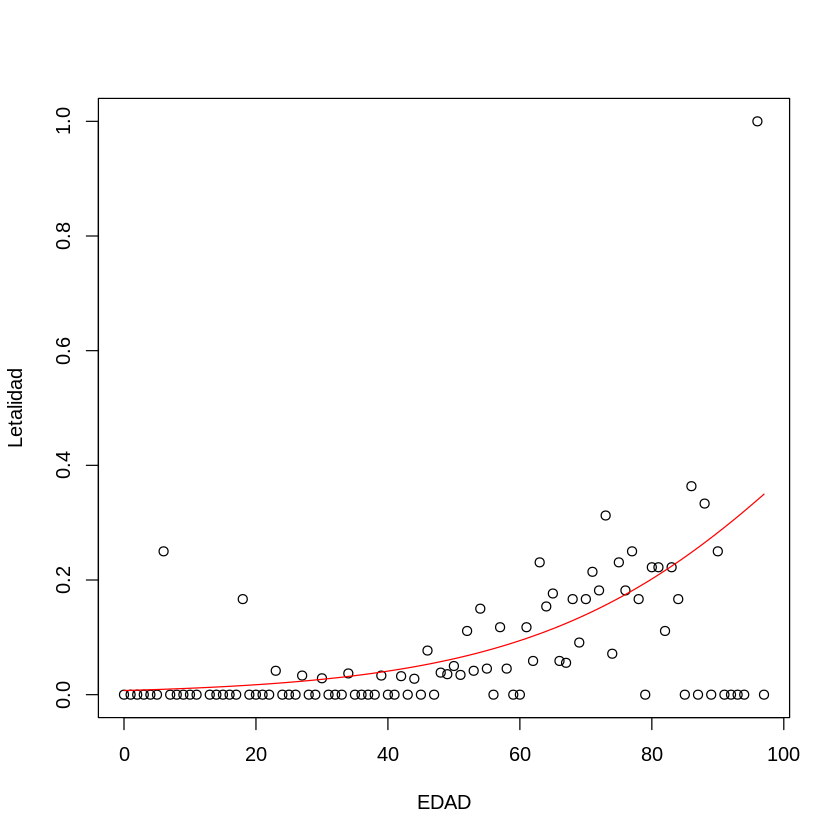

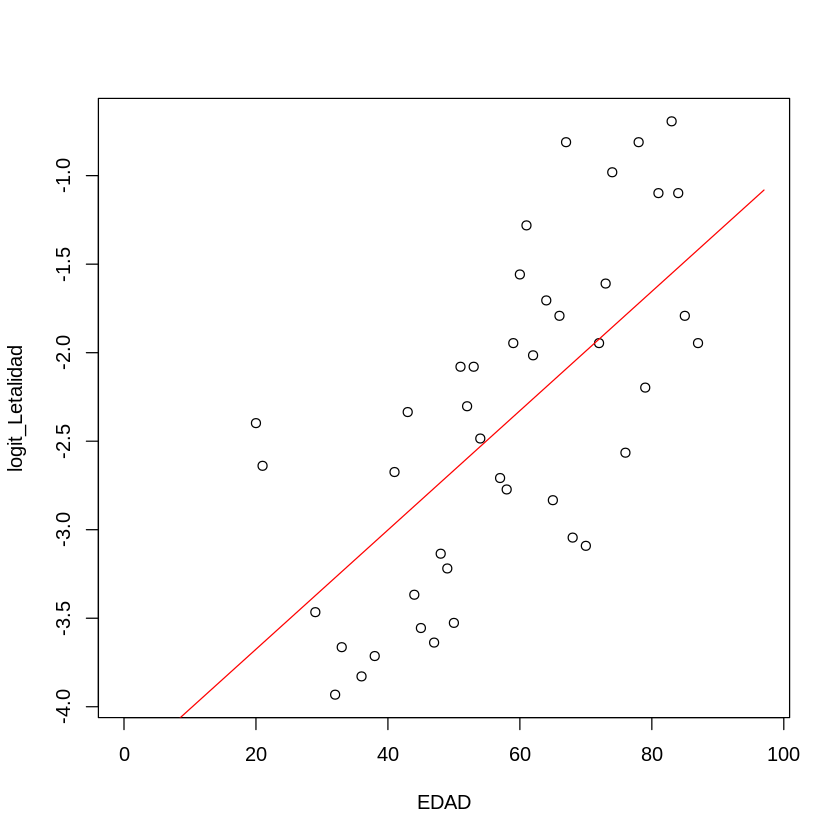

[1] "==========================================================="
[1] "NAYARIT"


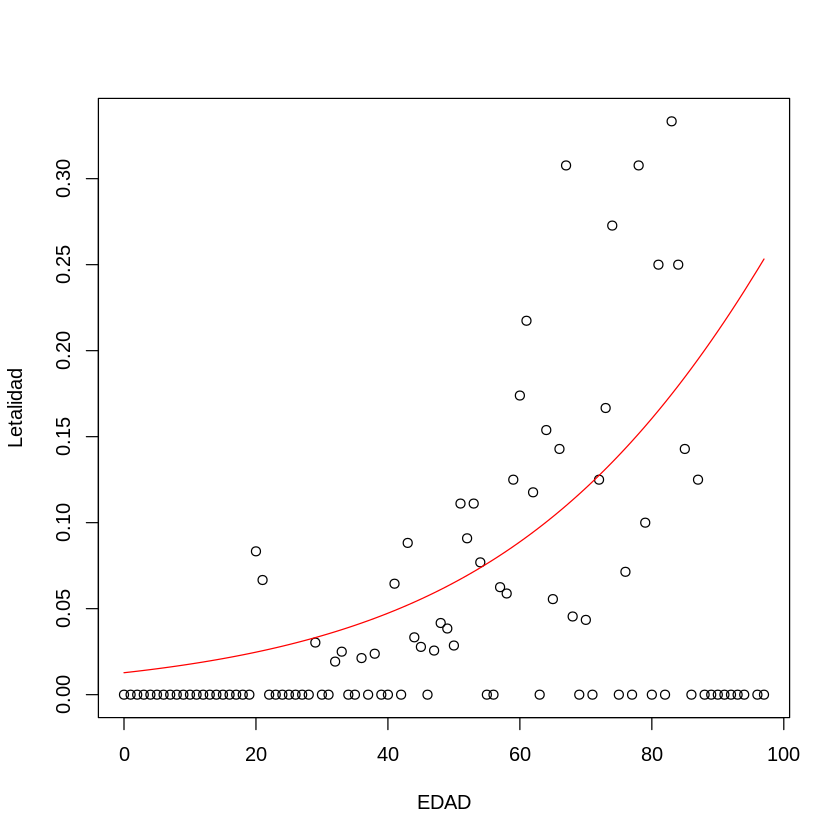

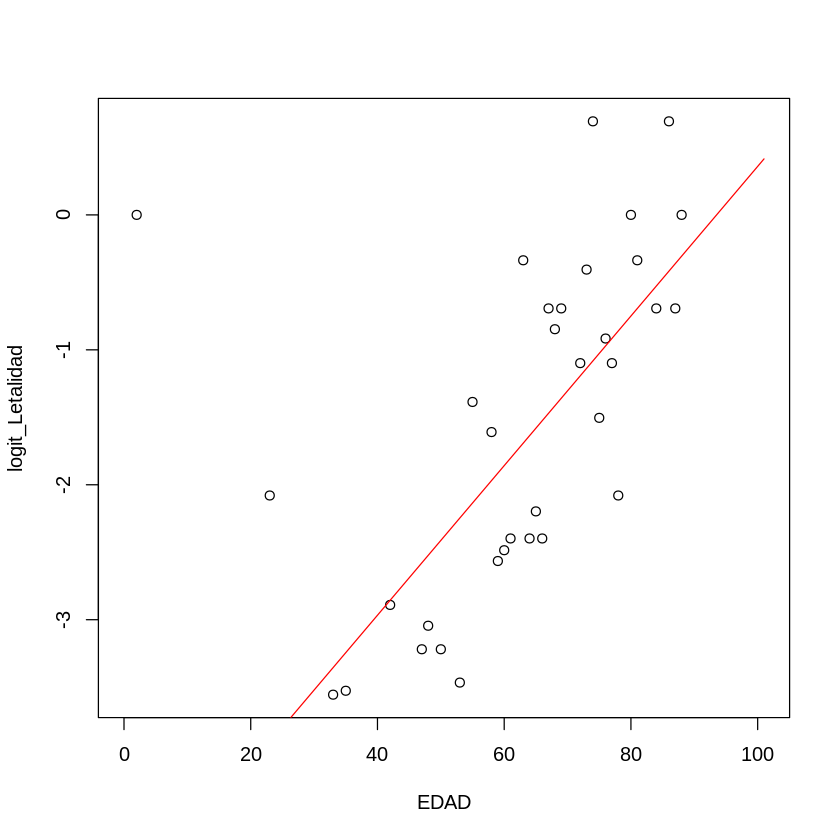

[1] "==========================================================="
[1] "QUINTANA ROO"


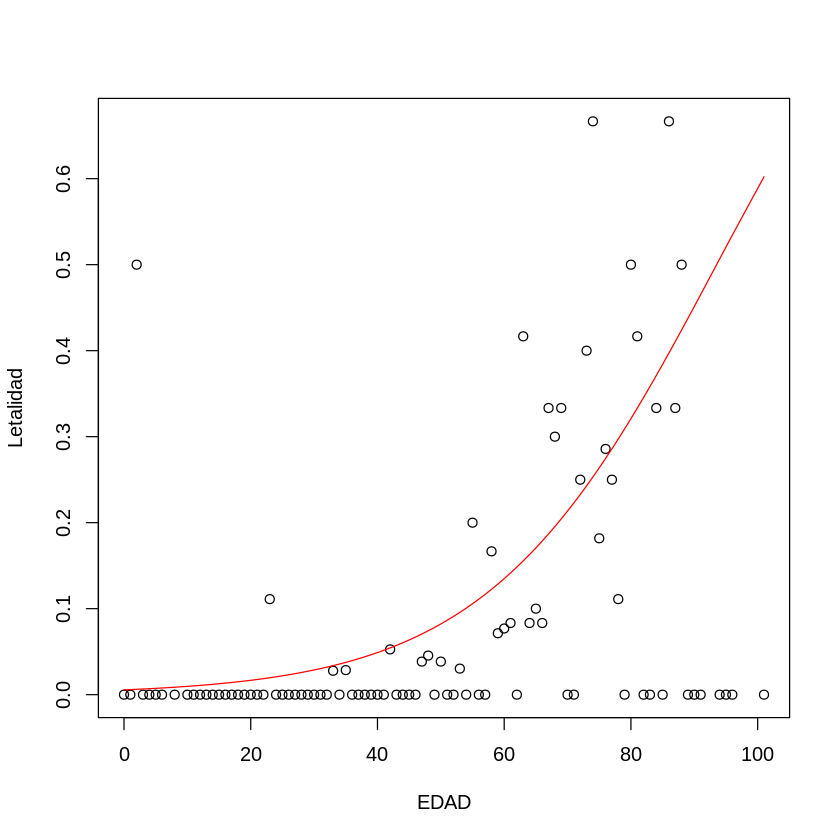

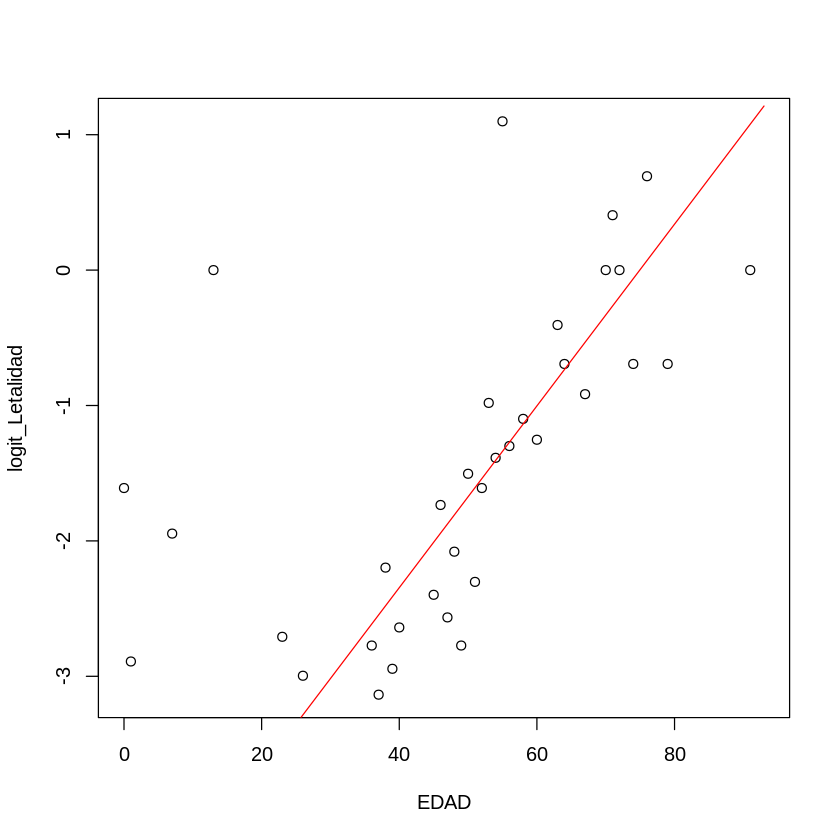

[1] "==========================================================="
[1] "NUEVO LEÓN"


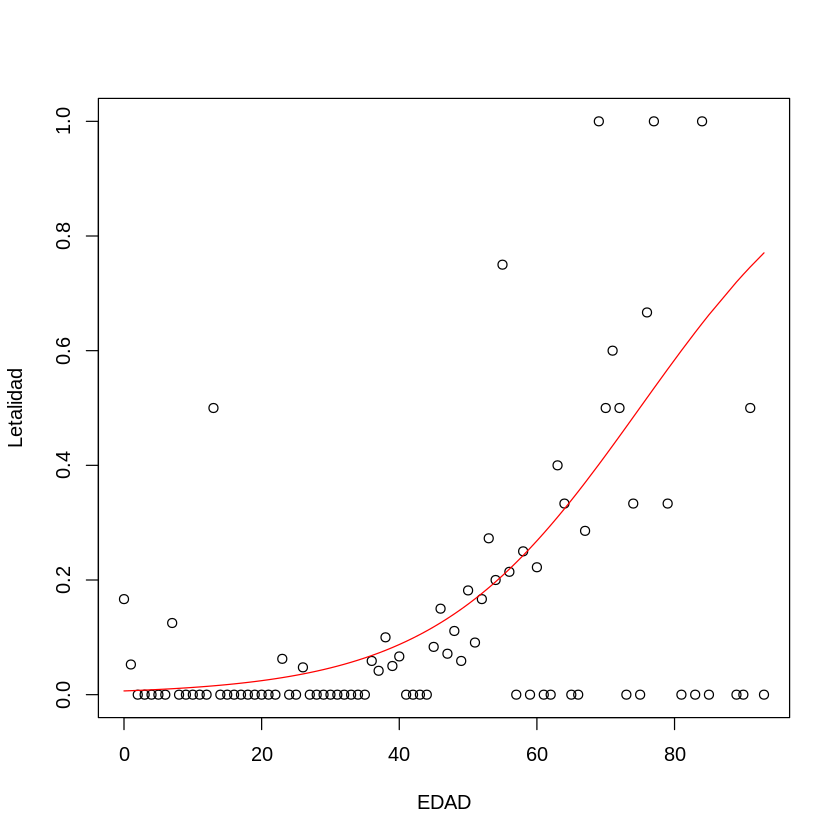

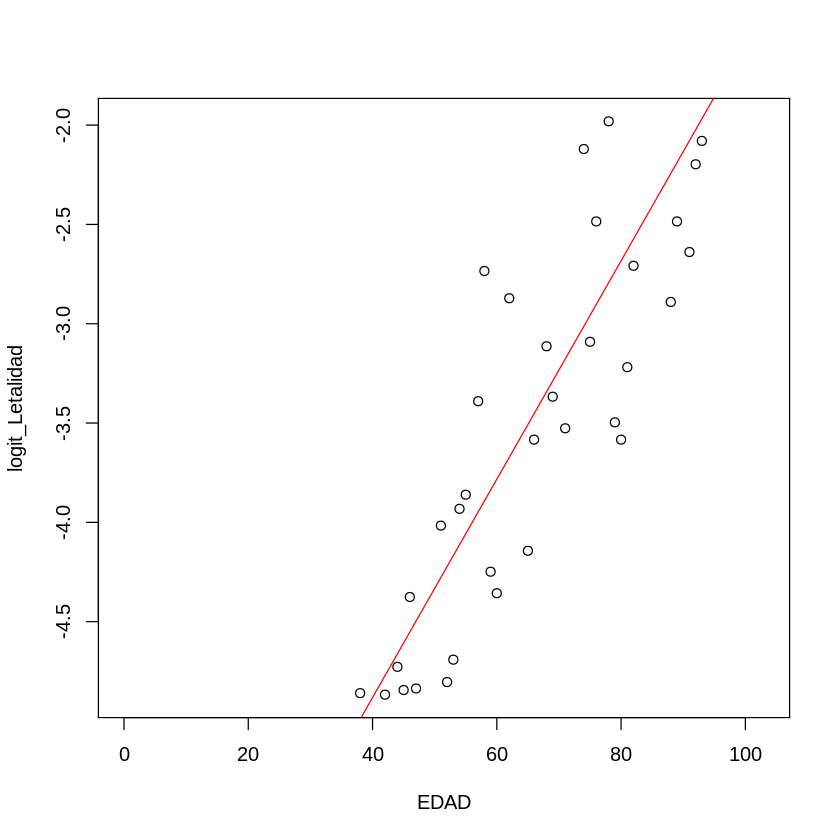

[1] "==========================================================="
[1] "QUERÉTARO"


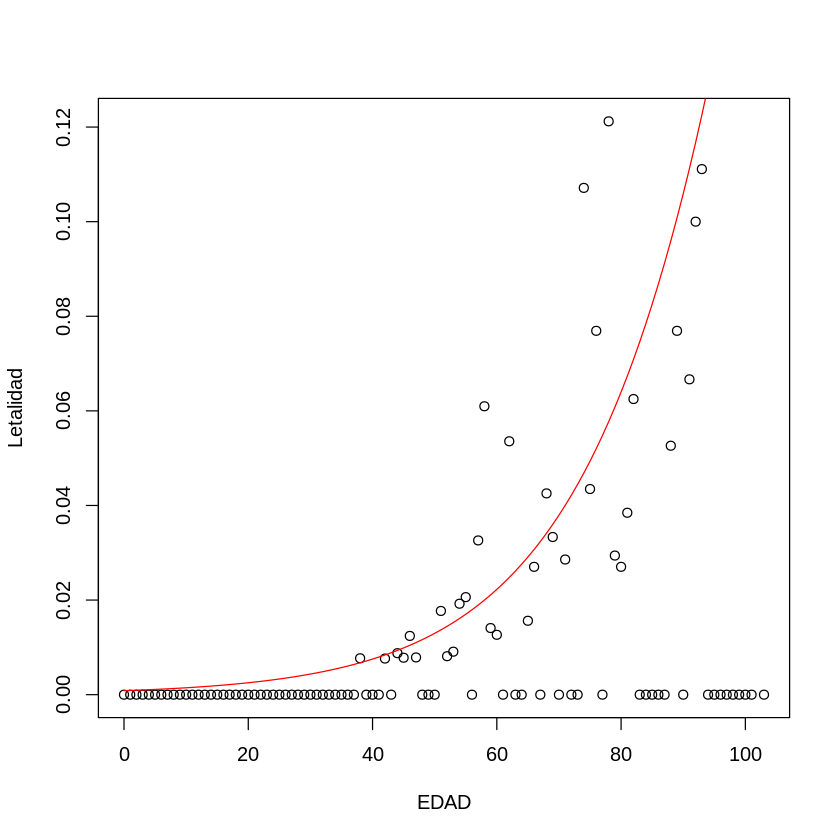

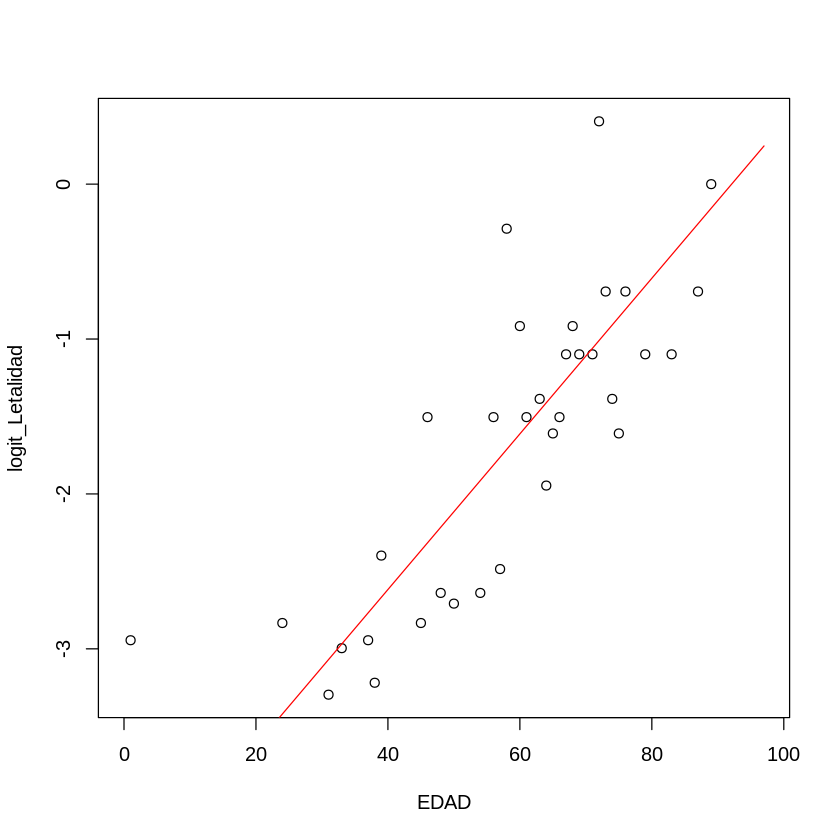

[1] "==========================================================="
[1] "CAMPECHE"


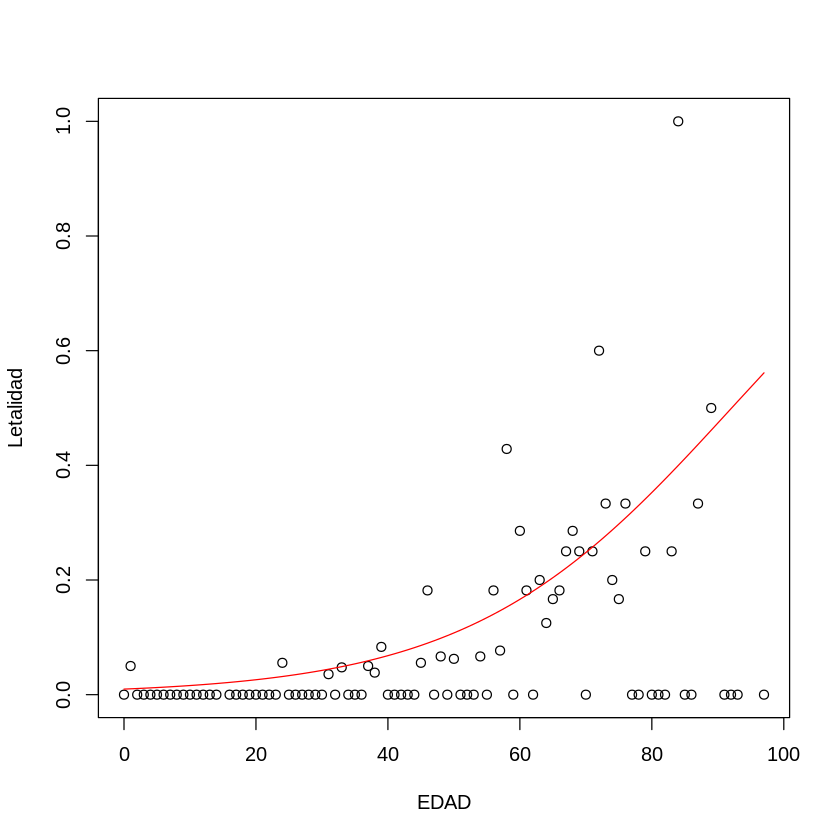

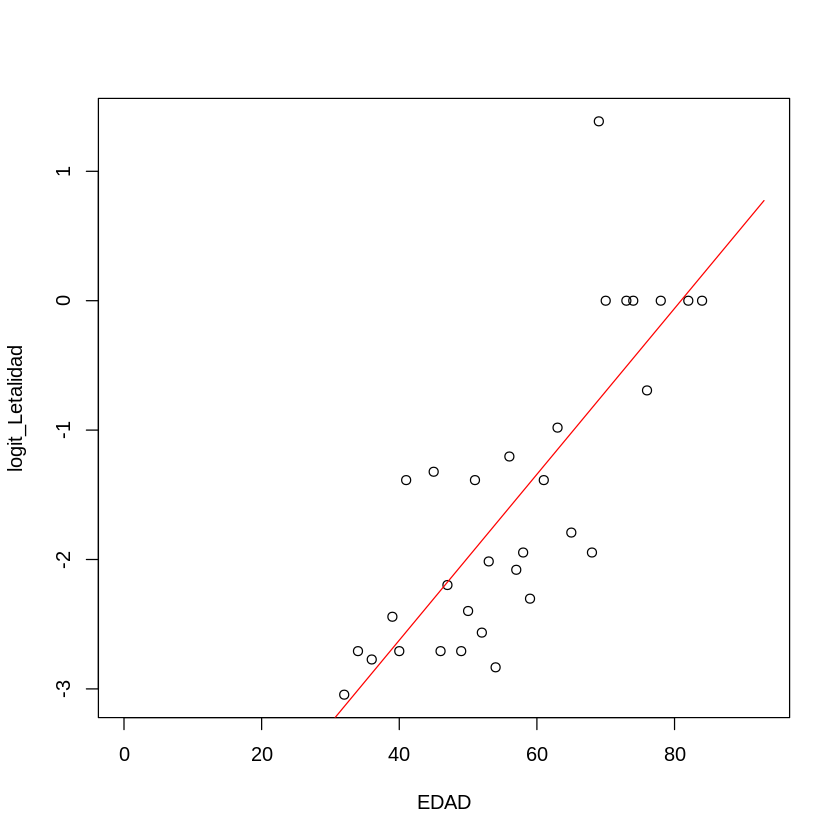

[1] "==========================================================="
[1] "NO ESPECIFICADO"


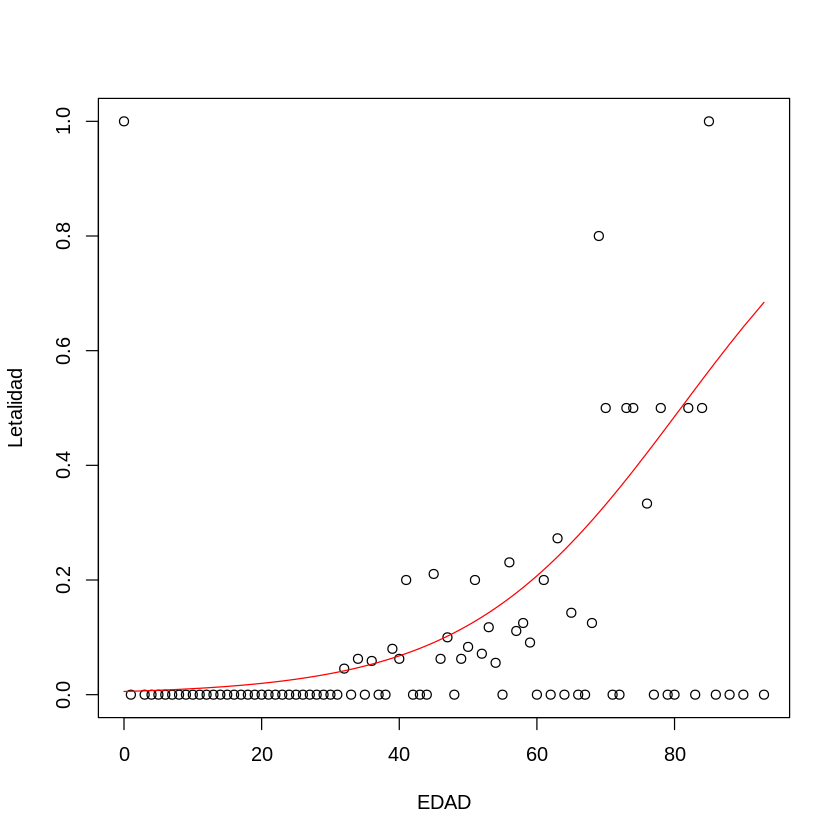

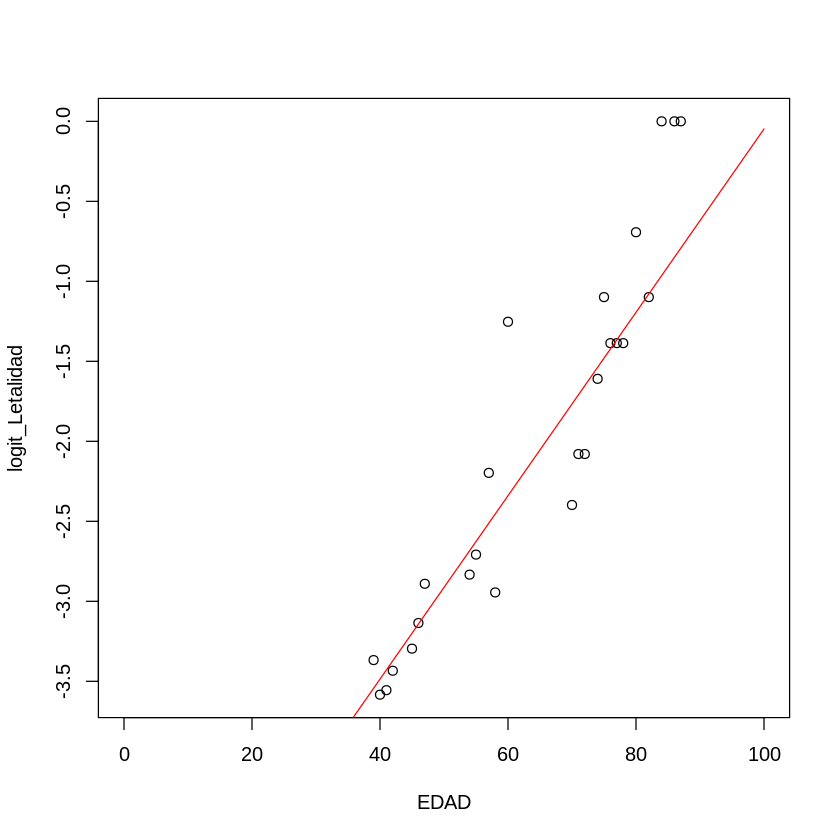

[1] "==========================================================="
[1] "BAJA CALIFORNIA SUR"


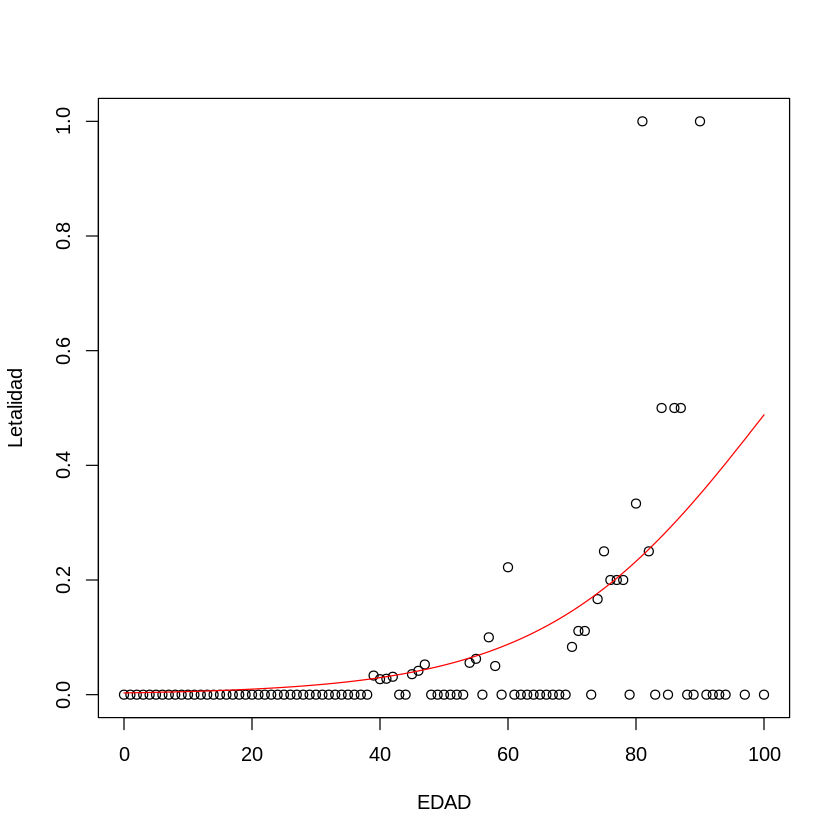

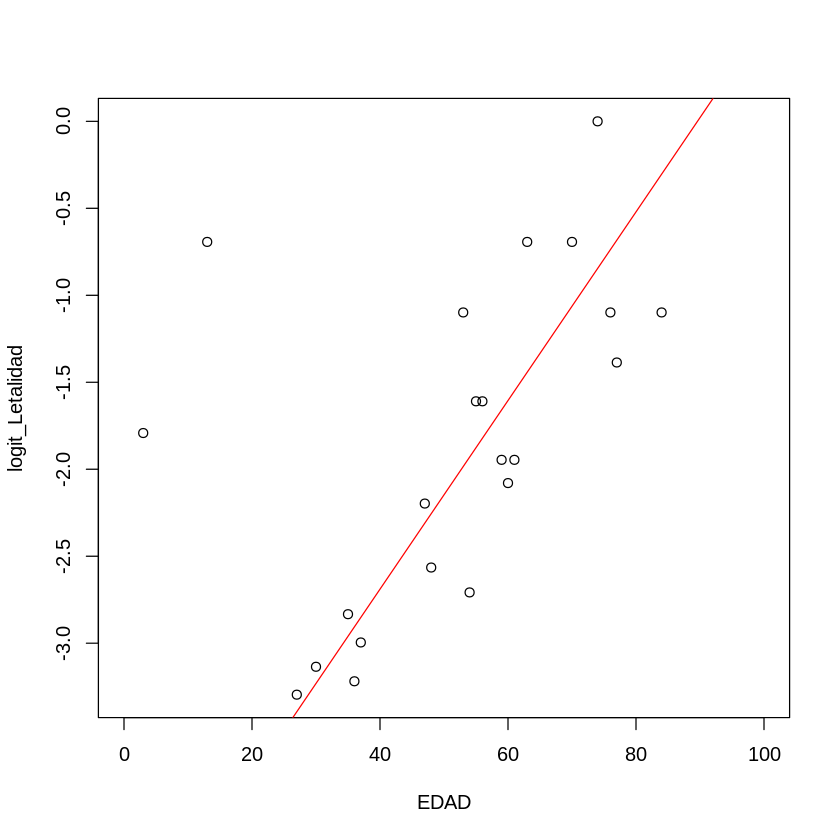

[1] "==========================================================="
[1] "AGUASCALIENTES"


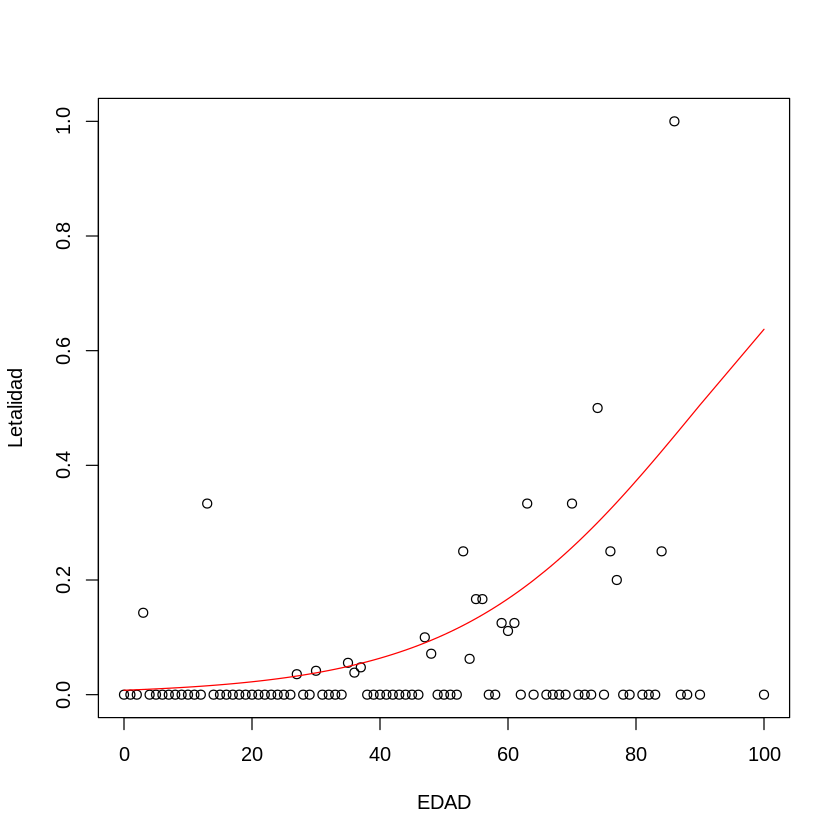

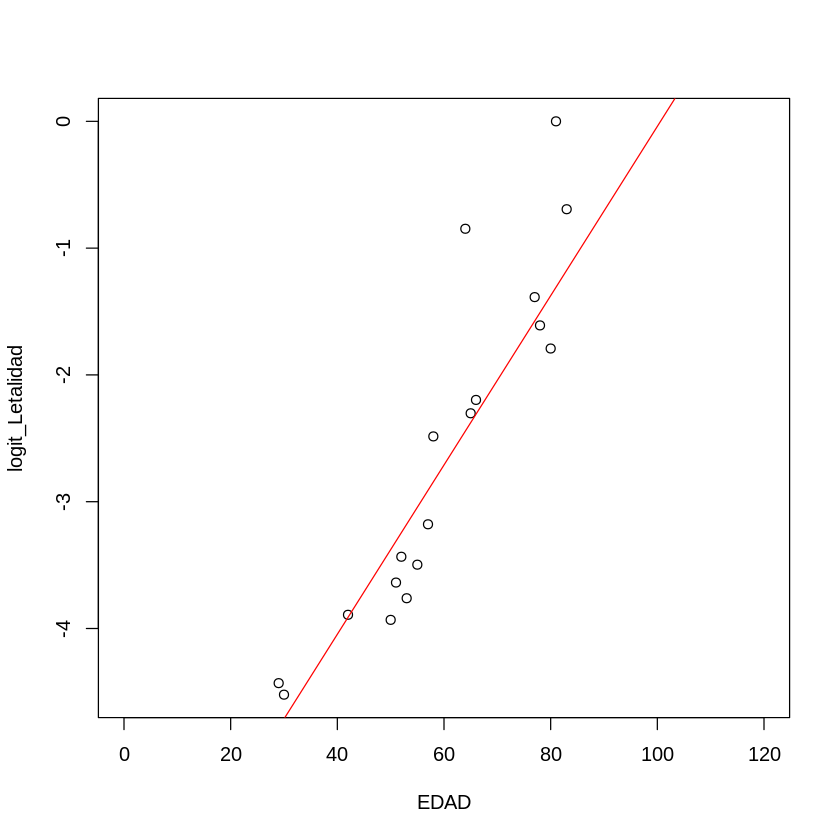

[1] "==========================================================="
[1] "COLIMA"


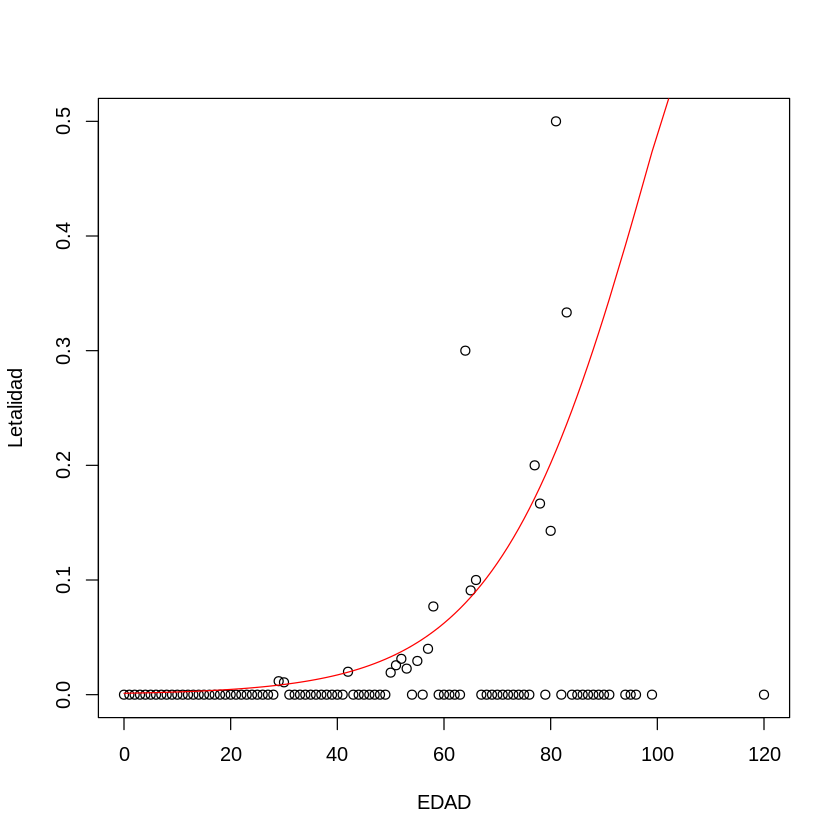

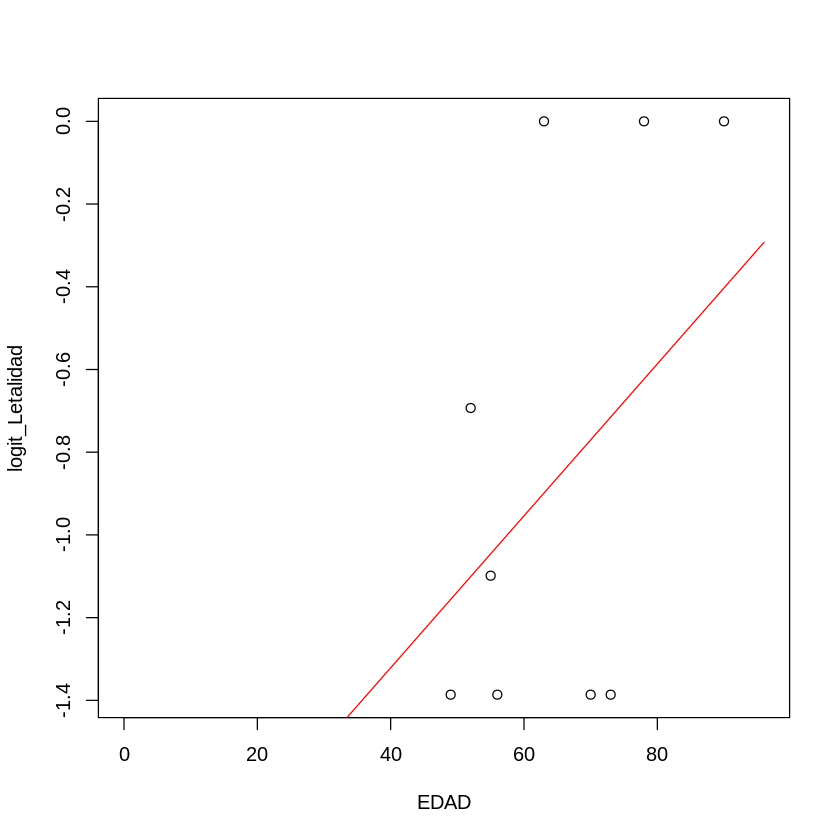

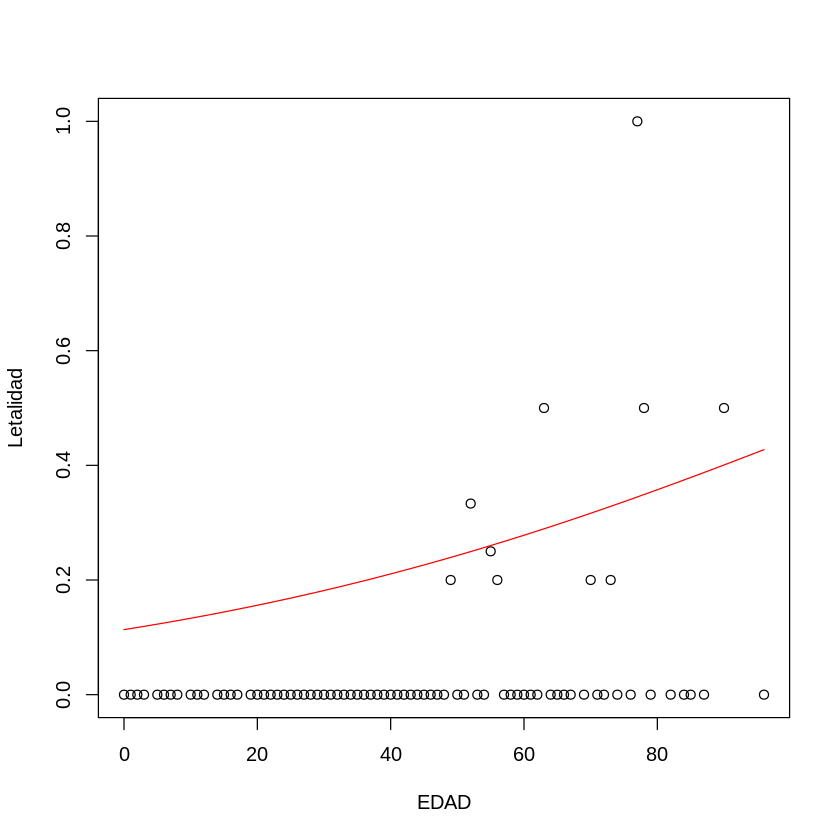

In [176]:
for(estado in Letalidad_estados$ENTIDAD_NAC_merge){
    print("===========================================================")
    print(estado)
    estimar_tasas(datos_actuales[datos_actuales$ENTIDAD_NAC_merge == estado,])    
}

In [14]:
### Proporción de datos por edades

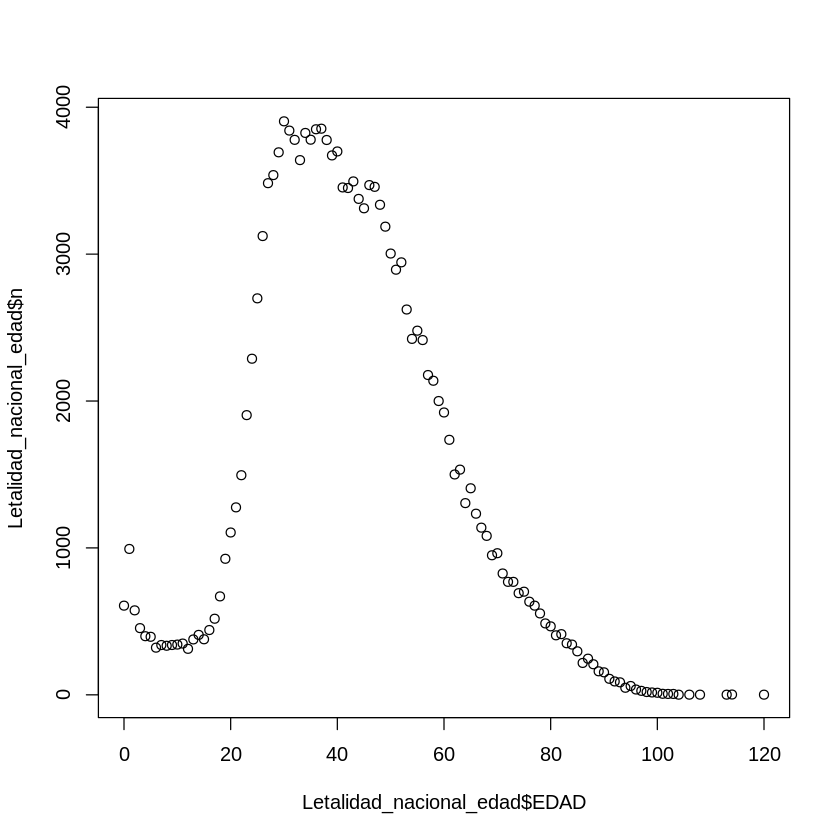

In [15]:
plot(Letalidad_nacional_edad$EDAD, Letalidad_nacional_edad$n)

In [20]:
Letalidad_nacional_edad$mas_80 <- ifelse(Letalidad_nacional_edad$EDAD <= 80, 0, 1)
Letalidad_nacional_edad %>% 
group_by(mas_80) %>%
summarise(proporcion = sum(n))

mas_80 proporcion
1 0      152610    
2 1        3322

In [21]:
Letalidad_nacional_edad %>% 
group_by(mas_80) %>%
summarise(proporcion = sum(n))/ sum(Letalidad_nacional_edad$n)

mas_80       proporcion
1 0.000000e+00 0.97869584
2 6.413052e-06 0.02130416

### Letalidad Casos Activos

Personas que empezarón con los sintomas 14 días 

In [22]:
mode(datos_actuales$FECHA_SINTOMAS)

[1] "numeric"

In [23]:
head(datos_actuales$FECHA_SINTOMAS)

[1] 2020-04-22 2020-05-09 2020-05-02 2020-05-04 2020-03-12 2020-04-16
135 Levels: 2020-01-01 2020-01-02 2020-01-03 2020-01-04 ... 2020-05-14

In [53]:
datos_actuales$FECHA_SINTOMAS <- as.Date(datos_actuales$FECHA_SINTOMAS, format = "%Y-%m-%d")

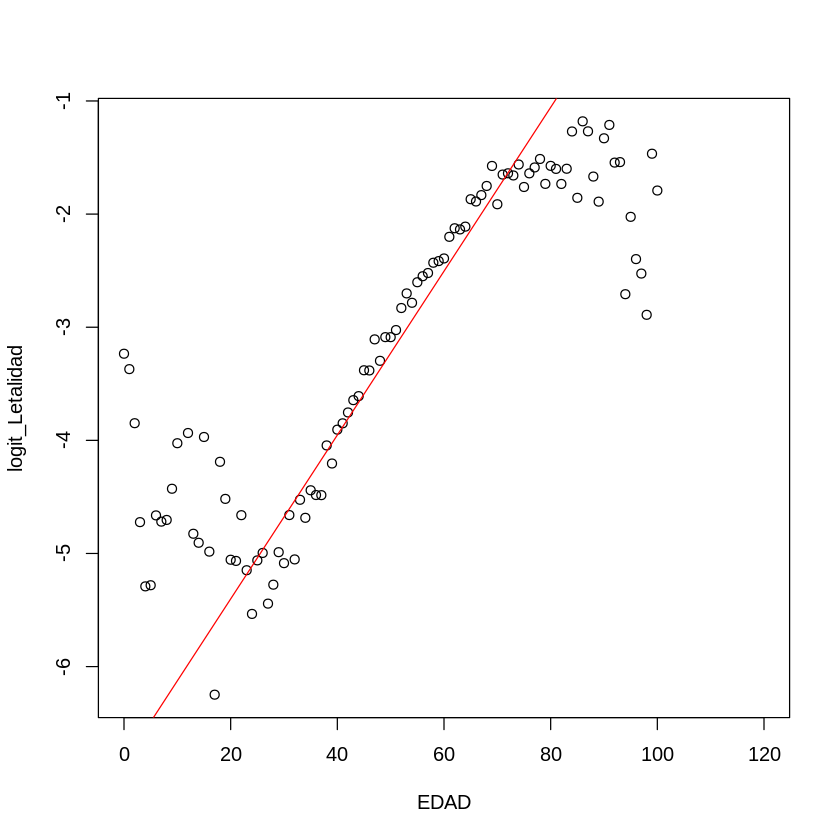

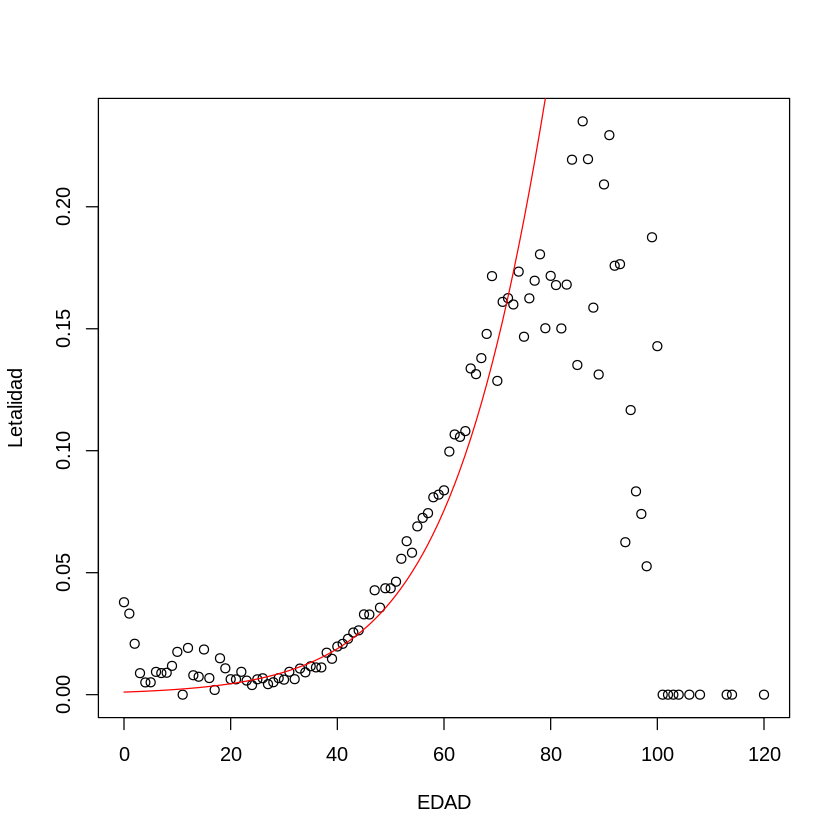

In [54]:
Nacional_historica <- estimar_tasas(datos_actuales)

In [55]:
Sys.Date() - 14

[1] "2020-05-01"

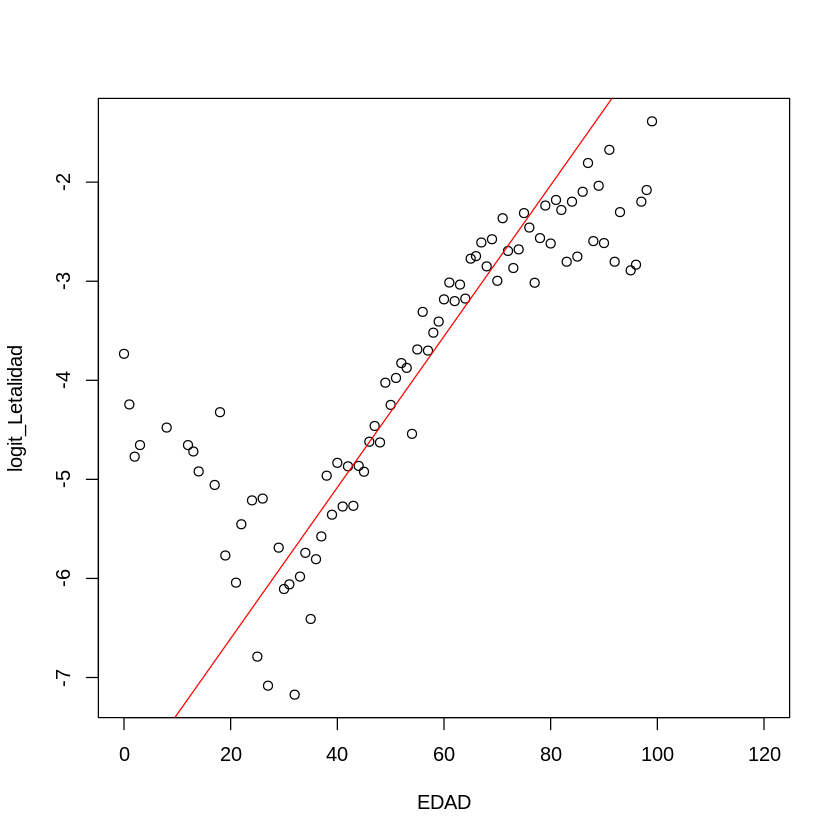

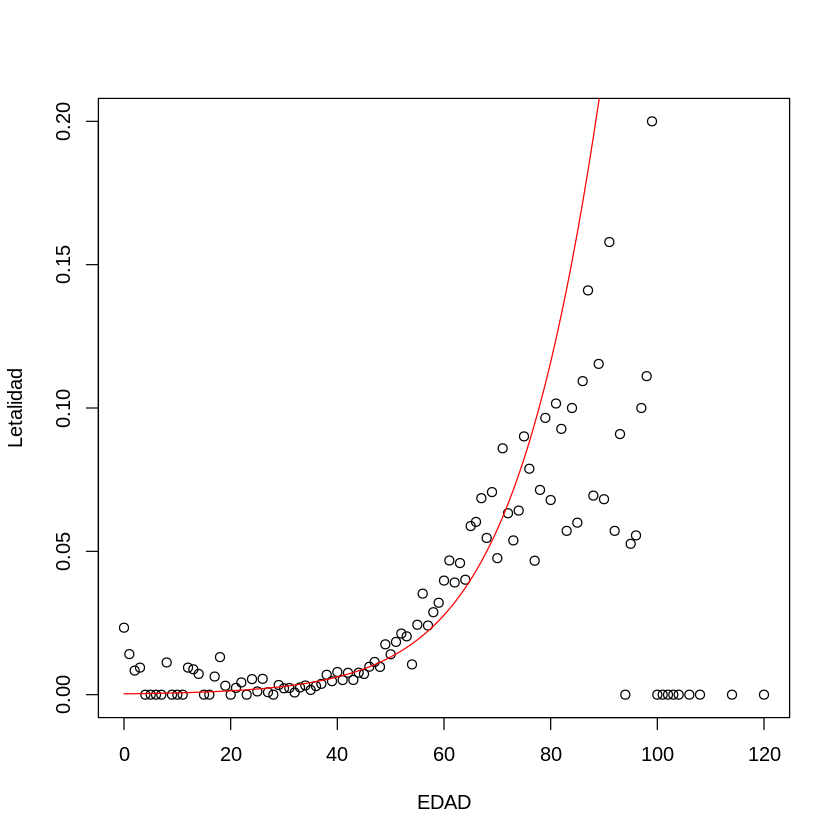

In [56]:
Nacional_activos <- estimar_tasas(
    datos_actuales[datos_actuales$FECHA_SINTOMAS >= Sys.Date() - 14, ]
)

In [57]:
tasas_letalidad <- merge(Nacional_activos, Nacional_historica, by = "EDAD", all = T)

In [58]:
head(tasas_letalidad)

EDAD Letalidad.x Estimada_media_logit_tasas.x Letalidad.y
1 0    0.023364486 0.0002940239                 0.037891269
2 1    0.014150943 0.0003173148                 0.033232628
3 2    0.008403361 0.0003424500                 0.020869565
4 3    0.009433962 0.0003695755                 0.008810573
5 4    0.000000000 0.0003988488                 0.005012531
6 5    0.000000000 0.0004304397                 0.005063291
  Estimada_media_logit_tasas.y
1 0.001058207                 
2 0.001137596                 
3 0.001222934                 
4 0.001314666                 
5 0.001413268                 
6 0.001519255

In [59]:
names(tasas_letalidad) <- c("EDAD", "Letalidad_histórica", "Letalidad_histórica_ajustada", "Letalidad_casos_activos", "Letalidad_casos_activos_ajustada")

In [60]:
head(tasas_letalidad)

EDAD Letalidad_histórica Letalidad_histórica_ajustada Letalidad_casos_activos
1 0    0.023364486         0.0002940239                 0.037891269            
2 1    0.014150943         0.0003173148                 0.033232628            
3 2    0.008403361         0.0003424500                 0.020869565            
4 3    0.009433962         0.0003695755                 0.008810573            
5 4    0.000000000         0.0003988488                 0.005012531            
6 5    0.000000000         0.0004304397                 0.005063291            
  Letalidad_casos_activos_ajustada
1 0.001058207                     
2 0.001137596                     
3 0.001222934                     
4 0.001314666                     
5 0.001413268                     
6 0.001519255

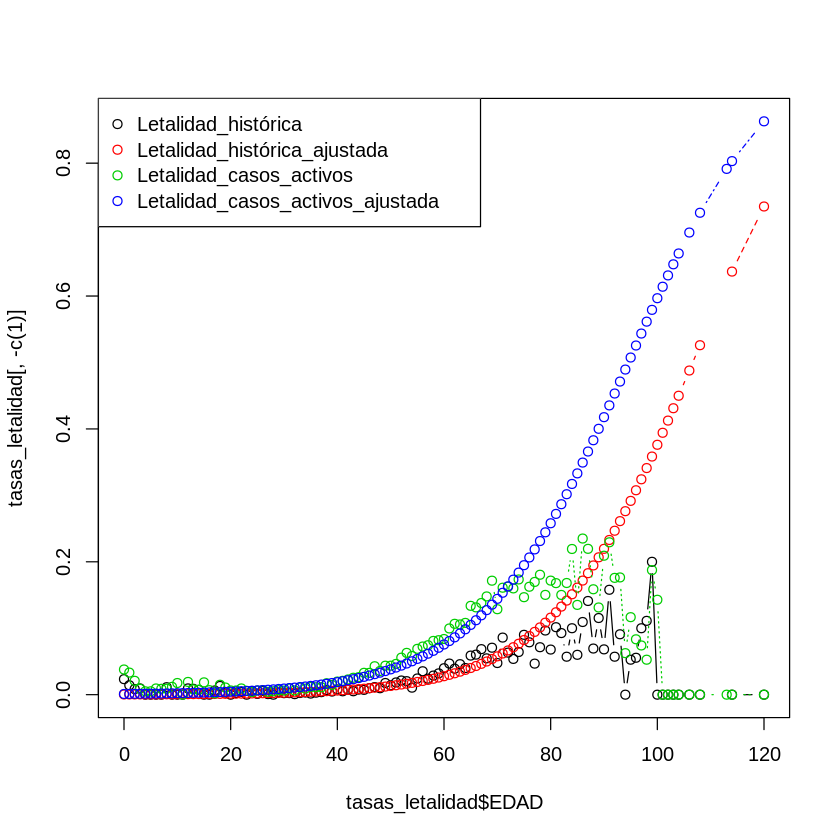

In [63]:
 matplot(x = tasas_letalidad$EDAD, tasas_letalidad[, -c(1)], type = c("b"),pch=1,col = 1:4) #plot
 legend("topleft", 
        legend = c("Letalidad_histórica", "Letalidad_histórica_ajustada", "Letalidad_casos_activos", "Letalidad_casos_activos_ajustada"), 
        col=1:4, pch=1)

In [64]:
tasas_letalidad <- tasas_letalidad[tasas_letalidad$EDAD <= 80 & tasas_letalidad$EDAD >= 20, ]

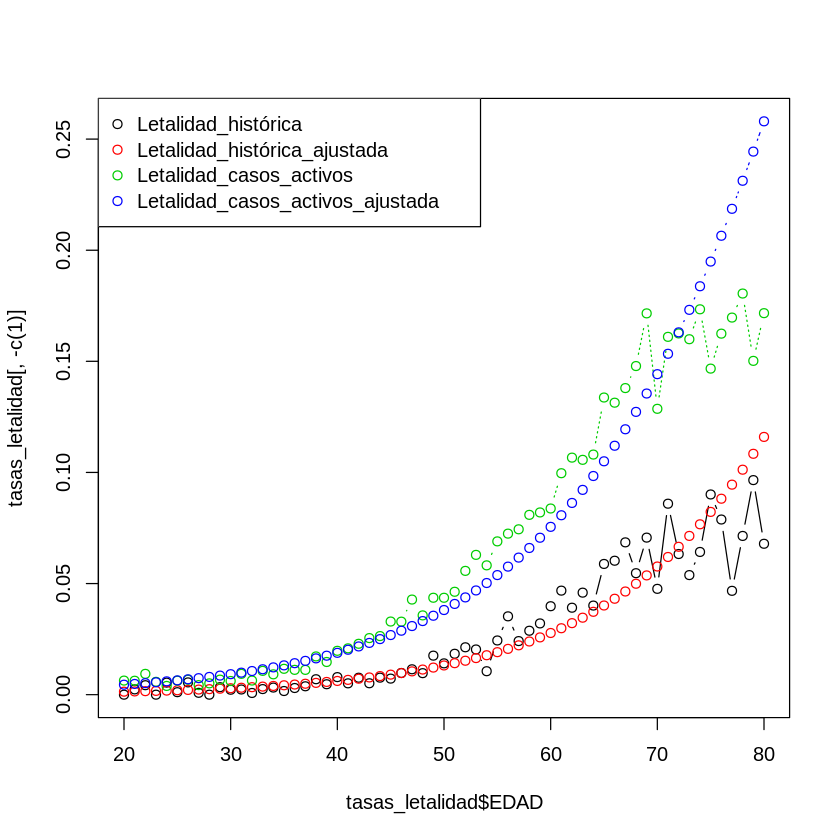

In [65]:
 matplot(x = tasas_letalidad$EDAD, tasas_letalidad[, -c(1)], type = c("b"),pch=1,col = 1:4) #plot
 legend("topleft", 
        legend = c("Letalidad_histórica", "Letalidad_histórica_ajustada", "Letalidad_casos_activos", "Letalidad_casos_activos_ajustada"), 
        col=1:4, pch=1)